# America Crime Analytics



#Introduction 


##Project Purpose
In this project we explore crime by different factors across the country at county levels. The project explores different combination of socioeconomic statuses based on the following:

*   Impact of education level on crime rate.
*   Economic impact of income level and if it drives different crime levels.
*   Predominance of crime amongst the unemployed.
*   The prevalence of crime and the of impact on poverty factors.
*   The association of crime based on population density and the levels of poverty with different age groups.

<center>

![pic](https://media.istockphoto.com/photos/discovery-search-magnifying-glass-picture-id1170287651?k=20&m=1170287651&s=170667a&w=0&h=JlOUPsFejr4bfDmxqgZltCVkSOGUOhE60W8bcECNBvo=)



##Citation
###Source1
Finkelhor, Turner, H. A., Shattuck, A., & Hamby, S. L. (2015). Prevalence of Childhood Exposure to Violence, Crime, and Abuse: Results From the National Survey of Children’s Exposure to Violence. JAMA Pediatrics, 169(8), 746–754. https://doi.org/10.1001/jamapediatrics.2015.0676

### Source 2

Wikström, Ceccato, V., Hardie, B., & Treiber, K. (2010). Activity Fields and the Dynamics of Crime: Advancing Knowledge About the Role of the Environment in Crime Causation. Journal of Quantitative Criminology, 26(1), 55–87. https://doi.org/10.1007/s10940-009-9083-9

### Source 3
AALTONEN, MACDONALD, J. M., MARTIKAINEN, P., & KIVIVUORI, J. (2013). EXAMINING THE GENERALITY OF THE UNEMPLOYMENT-CRIME ASSOCIATION. Criminology (Beverly Hills), 51(3), 561–594. https://doi.org/10.1111/1745-9125.12012

### Source 4
Copeland, Miller-Johnson, S., Keeler, G., Angold, A., & Costello, E. J. (2007). Childhood Psychiatric Disorders and Young Adult Crime: A Prospective, Population-Based Study. The American Journal of Psychiatry, 164(11), 1668–1675. https://doi.org/10.1176/appi.ajp.2007.06122026

### Source 5
Understanding Crime Trends
National Research Council, Division of Behavioral and Social Sciences and education, Committee on Law and Justice, Committee on Understanding Crime Trends
National Academies Press, Jan 5, 2009 
https://books.google.com/books?hl=en&lr=&id=PvpjAgAAQBAJ&oi=fnd&pg=PT28&dq=what+factors+influence+crime+in+the+US&ots=M2k9uanjjO&sig=MwjDEED4d5-N-yj9cyRCQ2KPYaU#v=onepage&q=what%20factors%20influence%20crime%20in%20the%20US&f=false

# Data Dre-processing

In [ ]:
import numpy as np   # import numpy
import pandas as pd  # import pandas 
import matplotlib.pyplot as plt  # import plot module
from pylab import *    # import figure
import seaborn as sns #import plot




In [ ]:
# read a .csv file of returns
# make sure you navigate to your file and update the path!
# Save the link you were given in a variable
URL = 'https://drive.google.com/file/d/1ozeGhccw0RvyAQ2kKe3rfNYSFX14tSAc/view?usp=sharing'
# You will need the line below to indicate that you will download the content of the link
fixed_path = 'https://drive.google.com/uc?export=download&id='
# Extract the file ID from the URL
file_path = URL.split('/')[-2]

df = pd.read_csv(fixed_path + file_path)

df.head(10)  # to see the head of the data



,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,by State by Metropolitan and Nonmetropolitan C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[The data shown in this table do not reflect c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State,County,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,ALABAMA - Metropolitan Counties,Autauga,73,1,12,NaN,8,52,429,146,233,50,NaN
5,NaN,Baldwin,127,1,5,NaN,23,98,613,229,342,42,NaN
6,NaN,Bibb,0,0,0,NaN,0,0,37,20,14,3,NaN
7,NaN,Blount,394,1,17,NaN,9,367,867,261,501,105,NaN
8,NaN,Calhoun,23,0,7,NaN,5,11,319,137,181,1,NaN
9,NaN,Chilton,151,0,10,NaN,3,138,592,247,295,50,NaN


## drop the first 4 and the last 10 rows! and make the rows into column header 

In [ ]:
# DO NOT RUN THIS FOR MORE THAN ONE TIMES 
# we need to delete the first 4 and the last 10
new_header = df.iloc[3] #grab the 4th (3) row for the header
df = df[4:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.drop(df.tail(9).index,inplace=True)  # DROP THE LAST 10 ROWS!
df1=df

df1

3,State,County,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,ALABAMA - Metropolitan Counties,Autauga,73,1,12,NaN,8,52,429,146,233,50,NaN
5,NaN,Baldwin,127,1,5,NaN,23,98,613,229,342,42,NaN
6,NaN,Bibb,0,0,0,NaN,0,0,37,20,14,3,NaN
7,NaN,Blount,394,1,17,NaN,9,367,867,261,501,105,NaN
8,NaN,Calhoun,23,0,7,NaN,5,11,319,137,181,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,NaN,Sublette,3,0,0,NaN,1,2,79,5,69,5,0
2612,NaN,Sweetwater,25,0,7,NaN,0,18,124,33,69,22,5
2613,NaN,Uinta,4,0,0,NaN,0,4,60,5,50,5,0
2614,NaN,Washakie,0,0,0,NaN,0,0,14,4,7,3,0


In [ ]:
df1.info() # see the data type of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 4 to 2615
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   State                                 90 non-null     object
 1   County                                2612 non-null   object
 2   Violent
crime                         2610 non-null   object
 3   Murder and
nonnegligent
manslaughter  2612 non-null   object
 4   Rape
(revised
definition)1            2276 non-null   object
 5   Rape
(legacy
definition)2             335 non-null    object
 6   Robbery                               2612 non-null   object
 7   Aggravated
assault                    2611 non-null   object
 8   Property
crime                        2598 non-null   object
 9   Burglary                              2602 non-null   object
 10  Larceny-
theft                        2609 non-null   object
 11  Motor
vehicle
theft           

## Change the column into correct data type 

In [ ]:
# change column 3-13 to numeric
#!!!!!!!!MUST DO THIS ONE BY ONE , OR SERIOUS MISTAKE COULD OCCUR!!!!!
df1['Violent\ncrime']=pd.to_numeric(df['Violent\ncrime'],errors='coerce')   # coerce the errors
df1['Murder and\nnonnegligent\nmanslaughter']=pd.to_numeric(df['Murder and\nnonnegligent\nmanslaughter'],errors='coerce')   # coerce the errors
df1['Rape\n(revised\ndefinition)1']=pd.to_numeric(df['Rape\n(revised\ndefinition)1'],errors='coerce')   # coerce the errors
df1['Rape\n(legacy\ndefinition)2']=pd.to_numeric(df['Rape\n(legacy\ndefinition)2'],errors='coerce')   # coerce the errors
df1['Robbery']=pd.to_numeric(df['Robbery'],errors='coerce')   # coerce the errors
df1['Aggravated\nassaul']=pd.to_numeric(df['Aggravated\nassault'],errors='coerce')   # coerce the errors
df1['Property\ncrime']=pd.to_numeric(df['Property\ncrime'],errors='coerce')   # coerce the errors
df1['Burglary']=pd.to_numeric(df['Burglary'],errors='coerce')   # coerce the errors
df1['Larceny-\ntheft']=pd.to_numeric(df['Larceny-\ntheft'],errors='coerce') 
df1['Motor\nvehicle\ntheft']=pd.to_numeric(df['Motor\nvehicle\ntheft'],errors='coerce') 
df1['Arson3']=pd.to_numeric(df['Arson3'],errors='coerce') 


In [ ]:
df1.info()  # see if we success

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 4 to 2615
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State                                 90 non-null     object 
 1   County                                2612 non-null   object 
 2   Violent
crime                         2577 non-null   float64
 3   Murder and
nonnegligent
manslaughter  2612 non-null   int64  
 4   Rape
(revised
definition)1            2276 non-null   float64
 5   Rape
(legacy
definition)2             335 non-null    float64
 6   Robbery                               2606 non-null   float64
 7   Aggravated
assault                    2611 non-null   object 
 8   Property
crime                        2335 non-null   float64
 9   Burglary                              2547 non-null   float64
 10  Larceny-
theft                        2437 non-null   float64
 11  Motor
vehicle
the

In [ ]:
df1.loc[:, 'Sum of crimes'] = df.iloc[:, 2:12].sum(axis=1)  #  create a column named sum of crime 

print(df1)     # see if it works

3                               State  ... Sum of crimes
4     ALABAMA - Metropolitan Counties  ...         952.0
5                                 NaN  ...        1382.0
6                                 NaN  ...          74.0
7                                 NaN  ...        2155.0
8                                 NaN  ...         673.0
...                               ...  ...           ...
2611                              NaN  ...         162.0
2612                              NaN  ...         280.0
2613                              NaN  ...         124.0
2614                              NaN  ...          28.0
2615                              NaN  ...           7.0

[2612 rows x 15 columns]


In [ ]:
# delete all the column beside State, County,Sum of crime

# DELETE it one by one  by names! This is much safer than base on location
df1.drop(['Violent\ncrime', 'Murder and\nnonnegligent\nmanslaughter', 
                'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2','Robbery','Aggravated\nassaul','Property\ncrime','Burglary','Larceny-\ntheft','Motor\nvehicle\ntheft','Arson3','Aggravated\nassault'], axis=1, inplace=True)



In [ ]:
# see if it works
df1.head(10)

3,State,County,Sum of crimes
4,ALABAMA - Metropolitan Counties,Autauga,952.0
5,NaN,Baldwin,1382.0
6,NaN,Bibb,74.0
7,NaN,Blount,2155.0
8,NaN,Calhoun,673.0
9,NaN,Chilton,1348.0
10,NaN,Elmore,1475.0
11,NaN,Etowah,1123.0
12,NaN,Geneva,468.0
13,NaN,Hale,315.0


In [ ]:
#forward filling the state names

for col in ['State']:           # for the col in the [], which is state
    df1[col] = df[col].ffill()        # use forward filling to fill it 

df1                 # see if it works



3,State,County,Sum of crimes
4,ALABAMA - Metropolitan Counties,Autauga,952.0
5,ALABAMA - Metropolitan Counties,Baldwin,1382.0
6,ALABAMA - Metropolitan Counties,Bibb,74.0
7,ALABAMA - Metropolitan Counties,Blount,2155.0
8,ALABAMA - Metropolitan Counties,Calhoun,673.0
...,...,...,...
2611,WYOMING - Nonmetropolitan Counties,Sublette,162.0
2612,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0
2613,WYOMING - Nonmetropolitan Counties,Uinta,124.0
2614,WYOMING - Nonmetropolitan Counties,Washakie,28.0


# External Datasets (10 pts)
Each **group member** should find at least ONE dataset that can be joined to the ~2600 rows without substantial data loss (it’s OK to lose ~100 rows, but any more than that, please try to find a better/more complete dataset.) Make sure there’s a section in your script where it specifies who found each dataset - like this:












Note that this dataset needs some standard cleansing before you can get to modeling (i.e. getting rid of the first few and last few rows, forward filling the State names, replacing values inplace in a column, etc.) Your team will decide how to clean and pre-process this dataset - but make sure you make it easy for us to follow your logic (like you would present to your data science manager at work!) Lots of comments and subheaders will be appreciated and expected.


## externale dataset 1

 ‘COUNTY DATA 2016 unemployment rates’ - web link to data source：https://www.bls.gov/lau/laucnty16.xlsx

Plain explanation of the datasource and the columns/data types
This is a 2016 data of the unemployment rates of each county in 2016
Column 1: LAUS code

Column 2: State FIPS code

Column 3: County FIPS CODE

Column 4: County Name/State Abbreviation

Column 5: Year

Column 6: BLANK(THIS COLUMN IS BLANK!) 

Column 7: Labor Force

Column 8: employed

Column 9: Unemployed

Column 10: Unemployment Rate(%)

### IMPORT the data

***the fsq in variable names means Feisheng Qin***

In [ ]:
URLfsq = 'https://docs.google.com/spreadsheets/d/1VBhX4JWHeDkN78wPINiPyU3i0JRfJOhJ/edit?usp=sharing&ouid=117382658081748558051&rtpof=true&sd=true'
# You will need the line below to indicate that you will download the content of the link
fixed_pathfsq = 'https://drive.google.com/uc?export=download&id='
# Extract the file ID from the URL
file_pathfsq = URLfsq.split('/')[-2]

dffsq = pd.read_excel(fixed_pathfsq + file_pathfsq)

dffsq.head(10)# see if it works 

,"Labor Force Data by County, 2016 Annual Averages",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,State,County,NaN,NaN,NaN,NaN,NaN,NaN,Unemploy-
2,LAUS,FIPS,FIPS,NaN,NaN,NaN,Labor,NaN,NaN,ment Rate
3,Code,Code,Code,County Name/State Abbreviation,Year,NaN,Force,Employed,Unemployed,(%)
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CN0100100000000,01,001,"Autauga County, AL",2016,NaN,25710,24395,1315,5.1
6,CN0100300000000,01,003,"Baldwin County, AL",2016,NaN,89778,84972,4806,5.4
7,CN0100500000000,01,005,"Barbour County, AL",2016,NaN,8334,7638,696,8.4
8,CN0100700000000,01,007,"Bibb County, AL",2016,NaN,8539,7986,553,6.5
9,CN0100900000000,01,009,"Blount County, AL",2016,NaN,24380,23061,1319,5.4


### clean the data

In [ ]:
# DO NOT RUN THIS FOR MORE THAN ONE TIMES 
# we need to delete the first 4 and the last 10
new_headerfsq = dffsq.iloc[3] #grab the 4th (3) row for the header
dffsq = dffsq[5:] #take the data less the header row
dffsq.columns = new_headerfsq #set the header row as the df header
dffsq.drop(dffsq.tail(3).index,inplace=True)  # DROP THE LAST 3 ROWS!
dffsq1=dffsq  # ASSIGN IT TO dfsq1

dffsq1  # see if it works

3,Code,Code,Code,County Name/State Abbreviation,Year,NaN,Force,Employed,Unemployed,(%)
5,CN0100100000000,01,001,"Autauga County, AL",2016,NaN,25710,24395,1315,5.1
6,CN0100300000000,01,003,"Baldwin County, AL",2016,NaN,89778,84972,4806,5.4
7,CN0100500000000,01,005,"Barbour County, AL",2016,NaN,8334,7638,696,8.4
8,CN0100700000000,01,007,"Bibb County, AL",2016,NaN,8539,7986,553,6.5
9,CN0100900000000,01,009,"Blount County, AL",2016,NaN,24380,23061,1319,5.4
...,...,...,...,...,...,...,...,...,...,...
3219,CN7214500000000,72,145,"Vega Baja Municipio, PR",2016,NaN,13733,11829,1904,13.9
3220,CN7214700000000,72,147,"Vieques Municipio, PR",2016,NaN,3260,2914,346,10.6
3221,CN7214900000000,72,149,"Villalba Municipio, PR",2016,NaN,7815,6235,1580,20.2
3222,CN7215100000000,72,151,"Yabucoa Municipio, PR",2016,NaN,9081,7545,1536,16.9


In [ ]:
# we only need the unemployed rate,and the County Name/State Abbreviation which is the (%) column, drop all the other column\

dffsq2= dffsq1.iloc[: , 3:10]# only keep the 4 to 10 column
dffsq2.drop(['Year', 'Force', 'Employed','Unemployed'], axis=1, inplace=True)  # drop the unwanted data
dffsq2.dropna(inplace=True, how='all', axis=1)  # drop the NaN
dffsq2 = dffsq2.rename(columns={'(%)': 'Unemployed Rate'})  # rename the column


dffsq2# see if it wokrs



3,County Name/State Abbreviation,Unemployed Rate
5,"Autauga County, AL",5.1
6,"Baldwin County, AL",5.4
7,"Barbour County, AL",8.4
8,"Bibb County, AL",6.5
9,"Blount County, AL",5.4
...,...,...
3219,"Vega Baja Municipio, PR",13.9
3220,"Vieques Municipio, PR",10.6
3221,"Villalba Municipio, PR",20.2
3222,"Yabucoa Municipio, PR",16.9


In [ ]:
dffsq2['County'] = dffsq2['County Name/State Abbreviation'].str.split(',').str[0] # split and remain before the ,
dffsq2['State abbr'] = dffsq2['County Name/State Abbreviation'].str.split(', ').str[1]  #  split and remain before the ,
dffsq2['County'] = dffsq2['County'].str.replace(' County', '') # remove the ' country'
dffsq2['County'] = dffsq2['County'].str.replace(' Municipio', '')# remove the ' Municipio'
dffsq2 # see the dataframe
dffsq2.drop(['County Name/State Abbreviation'], axis=1, inplace=True)
dffsq2#see if it works

3,Unemployed Rate,County,State abbr
5,5.1,Autauga,AL
6,5.4,Baldwin,AL
7,8.4,Barbour,AL
8,6.5,Bibb,AL
9,5.4,Blount,AL
...,...,...,...
3219,13.9,Vega Baja,PR
3220,10.6,Vieques,PR
3221,20.2,Villalba,PR
3222,16.9,Yabucoa,PR


In [ ]:
dffsq2['County'].nunique() # we can see that many County name are repeated!
dffsq2['Key']=dffsq2['County']+dffsq2['State abbr']  # create a key, so we can join dataset by this unique key
dffsq2

3,Unemployed Rate,County,State abbr,Key
5,5.1,Autauga,AL,AutaugaAL
6,5.4,Baldwin,AL,BaldwinAL
7,8.4,Barbour,AL,BarbourAL
8,6.5,Bibb,AL,BibbAL
9,5.4,Blount,AL,BlountAL
...,...,...,...,...
3219,13.9,Vega Baja,PR,Vega BajaPR
3220,10.6,Vieques,PR,ViequesPR
3221,20.2,Villalba,PR,VillalbaPR
3222,16.9,Yabucoa,PR,YabucoaPR


###MUST READ THIS BEFORE JOINING YOUROWE DATASET

There are repeted county, so you must use County and the State abbr as key to join the external datasets!

In [ ]:
df1['The real State'] = df1['State'].str.split(' -').str[0]  # must be " -" or dictionary won't work
df1

3,State,County,Sum of crimes,The real State
4,ALABAMA - Metropolitan Counties,Autauga,952.0,ALABAMA
5,ALABAMA - Metropolitan Counties,Baldwin,1382.0,ALABAMA
6,ALABAMA - Metropolitan Counties,Bibb,74.0,ALABAMA
7,ALABAMA - Metropolitan Counties,Blount,2155.0,ALABAMA
8,ALABAMA - Metropolitan Counties,Calhoun,673.0,ALABAMA
...,...,...,...,...
2611,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WYOMING
2612,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WYOMING
2613,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WYOMING
2614,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WYOMING


In [ ]:
# CREATE A DICTIONARY 
dict= {
    "ALABAMA": "AL",
    "ALASKA": "AK",
    "ARIZONA": "AZ",
    "ARKANSAS": "AR",
    "CALIFORNIA": "CA",
    "COLORADO": "CO",
    "CONNECTICUT": "CT",
    "DELAWARE": "DE",
    "FLORIDA": "FL",
    "GEORGIA": "GA",
    "HAWAII": "HI",
    "IDAHO": "ID",
    "ILLINOIS": "IL",
    "INDIANA": "IN",
    "IOWA": "IA",
    "KANSAS": "KS",
    "KENTUCKY": "KY",
    "LOUISIANA": "LA",
    "MAINE": "ME",
    "MARYLAND": "MD",
    "MASSACHUSETTS": "MA",
    "MICHIGAN": "MI",
    "MINNESOTA": "MN",
    "MISSISSIPPI": "MS",
    "MISSOURI": "MO",
    "MONTANA": "MT",
    "NEBRASKA": "NE",
    "NEVADA": "NV",
    "NEW HAMPSHIRE": "NH",
    "NEW JERSEY": "NJ",
    "NEW MEXICO": "NM",
    "NEW YORK": "NY",
    "NORTH CAROLINA": "NC",
    "NORTH DAKOTA": "ND",
    "OHIO": "OH",
    "OKLAHOMA": "OK",
    "OREGON": "OR",
    "PENNSYLVANIA": "PA",  
    "RHODE ISLAND": "RI",  # do not have
    "SOUTH CAROLINA": "SC",
    "SOUTH DAKOTA": "SD",
    "TENNESSEE": "TN",
    "TEXAS": "TX",
    "UTAH": "UT",
    "VERMONT": "VT",
    "VIRGINIA": "VA",
    "WASHINGTON": "WA",         # do no have 
    "WEST VIRGINIA": "WV",
    "WISCONSIN": "WI",
    "WYOMING": "WY",
    "District of Columbia": "DC",
    "AMERICAN SAMOA": "AS",
    "GUAM": "GU",
    "Northern Mariana Islands": "MP",
    "PUERTO RICO": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI"
}




In [ ]:
df2=df1.replace({"The real State": dict})  # replace the state name to is abbreviation
df2 # see if it works
df2['The real State'].unique()  # see the unique value

array(['AL', 'AZ', 'AR', 'CA', 'CO', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL',
       'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MI', 'MN', 'MS', 'MO',
       'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK',
       'OR', 'PA', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
       'WI', 'WY'], dtype=object)

In [ ]:
# add a new column as the key of the original dataset
df2['Key']=df2['County'] + df2['The real State']
df2# see if it wokrs

3,State,County,Sum of crimes,The real State,Key
4,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL
5,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL
6,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL
7,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL
8,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL
...,...,...,...,...,...
2611,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY
2612,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY
2613,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY
2614,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY


### JOINT THE DATA

according to the instruction, missing rows should be around 100, this got 140 missing rows. This external dataset is meeting the requirment

In [ ]:
dfenrichbyfsq=pd.merge(df2,dffsq2,on='Key')
dfenrichbyfsq # this is the enrich dataset that with the unemployed rate
df1=dfenrichbyfsq  # overwrite the df1
df1# see the data 


3,State,County_x,Sum of crimes,The real State,Key,Unemployed Rate,County_y,State abbr
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,Autauga,AL
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,Baldwin,AL
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,Bibb,AL
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,Blount,AL
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,Calhoun,AL
...,...,...,...,...,...,...,...,...
2467,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,Sublette,WY
2468,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,Sweetwater,WY
2469,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,Uinta,WY
2470,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,Washakie,WY


In [ ]:
df1['Unemployed Rate']=pd.to_numeric(df1['Unemployed Rate'],errors='coerce')   # coerce the errors
df1['Sum of crime']=pd.to_numeric(df1['Sum of crimes'],errors='coerce')   # coerce the errors

## external dataset 2

‘Per Capita Personal Income by County, 2014 - 2016’ - web link to data source：https://www.bea.gov/sites/default/files/2017-12/lapi1117_0.xlsx

Plain explanation of the datasource and the columns/data types:

***This is Per Capita Personal Income by County, 2014 - 2016***

Column 1: states and counties

Column 2: personal income in 2014

Column 3: personal income in 2015

Column 4: personal income in 2016

Column 5: personal income rank in state

Column 6: personal income percent change in 2015

Column 7: personal income percent change in 2016

Column 8: personal income percent change rank in state


### IMPORT the data

In [ ]:
URL_zxw = 'https://docs.google.com/spreadsheets/d/1jU0gbHHB_PkoWbjlDorFXwOaNof3MZqA/edit?usp=sharing&ouid=107355851340191446200&rtpof=true&sd=true'
# You will need the line below to indicate that you will download the content of the link
fixed_path_zxw = 'https://drive.google.com/uc?export=download&id='
# Extract the file ID from the URL
file_path_zxw = URL_zxw.split('/')[-2]

fixed_path_zxw + file_path_zxw

df_zxw = pd.read_excel(fixed_path_zxw + file_path_zxw)

df_zxw.head(10)# see if it works 

,Unnamed: 0,2014 personal income($),2015 personal income($),2016 personal income($),Rank in State,2015 Percent change,2016 Percent change,2016 Rank
0,United States,46494.0,48451.0,49246.0,--,4.2,1.6,--
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALABAMA,36879.0,38214.0,38896.0,--,3.6,1.8,--
3,Autauga,36696.0,38575.0,39721.0,7,5.1,3.0,7
4,Baldwin,38939.0,40640.0,41286.0,5,4.4,1.6,34
5,Barbour,30166.0,31635.0,31788.0,50,4.9,0.5,57
6,Bibb,28123.0,28919.0,29264.0,65,2.8,1.2,43
7,Blount,30949.0,31560.0,31470.0,52,2.0,-0.3,62
8,Bullock,25199.0,26345.0,26661.0,67,4.5,1.2,42
9,Butler,32724.0,33475.0,33694.0,31,2.3,0.7,55


### clean the data

In [ ]:
# rename the columns we need
df_zxw.rename(columns={'Unnamed: 0':'County', '  2016 personal income($)':'Income'}, inplace=True)

In [ ]:
# check the result
df_zxw

,County,2014 personal income($),2015 personal income($),Income,Rank in State,2015 Percent change,2016 Percent change,2016 Rank
0,United States,46494.0,48451.0,49246.0,--,4.2,1.6,--
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALABAMA,36879.0,38214.0,38896.0,--,3.6,1.8,--
3,Autauga,36696.0,38575.0,39721.0,7,5.1,3.0,7
4,Baldwin,38939.0,40640.0,41286.0,5,4.4,1.6,34
...,...,...,...,...,...,...,...,...
3212,Sweetwater,48217.0,48912.0,48075.0,10,1.4,-1.7,13
3213,Teton,199813.0,198274.0,199635.0,1,-0.8,0.7,4
3214,Uinta,41116.0,40634.0,39613.0,19,-1.2,-2.5,15
3215,Washakie,42894.0,42573.0,42129.0,15,-0.7,-1.0,11


In [ ]:
# grap the columns we need for external dataset
df_zxw1 = df_zxw[['County','Income']]

In [ ]:
# exclude first 2 rows, we don't need that
df_zxw1 = df_zxw1.iloc[2:]
df_zxw1

,County,Income
2,ALABAMA,38896.0
3,Autauga,39721.0
4,Baldwin,41286.0
5,Barbour,31788.0
6,Bibb,29264.0
...,...,...
3212,Sweetwater,48075.0
3213,Teton,199635.0
3214,Uinta,39613.0
3215,Washakie,42129.0


In [ ]:
# By reading the xlsx file we know that those rows have '--' in the columns Rank in State means rows of state
# So we can extract the state data from county column
df_zxw_state = df_zxw[df_zxw['Rank in State'] == '--']['County'].iloc[1:]  ## Again, we don't need the first 2 rows
# store the index of state data, we will need it later
df_zxw_stateindex = list(df_zxw_state.index)
# change the state data to list
df_zxw_state = list(df_zxw_state)
# check the result
df_zxw_state

['ALABAMA',
 'ALASKA',
 'ARIZONA',
 'ARKANSAS',
 'CALIFORNIA',
 'COLORADO',
 'CONNECTICUT',
 'DELAWARE',
 'DISTRICT OF COLUMBIA',
 'FLORIDA',
 'GEORGIA',
 'HAWAII',
 'IDAHO',
 'ILLINOIS',
 'INDIANA',
 'LOWA',
 'KANSAS',
 'KENTUCKY',
 'LOUISIANA',
 'MAINE',
 'MARYLAND',
 'MASSACHUSETTS',
 'MICHIGAN',
 'MINNESOTA',
 'MISSISSIPPI',
 'MISSOURI',
 'MONTANA',
 'NEBRASKA',
 'NEVADA',
 'NEW HAMPSHIRE',
 'NEW JERSEY',
 'NEW MEXICO',
 'NEW YORK',
 'NORTH CAROLINA',
 'NORTH DAKOTA',
 'OHIO',
 'OKLAHOMA',
 'OREGON',
 'PENNSYLVANIA',
 'RHODE ISLAND',
 'SOUTH CAROLINA',
 'SOUTH DAKOTA',
 'TENNESSEE',
 'TEXAS',
 'UTAH',
 'VERMONT',
 'VIRGINIA',
 'WASHINGTON',
 'WEST VIRGINIA',
 'WISCONSIN',
 'WYOMING']

In [ ]:
# create a list of county
df_zxw_county = list(df_zxw1['County'])
# create a list to store the state data, so that we can merge it to our dataset later cause we want to divide the state from counties columns
df_states = []
for county in df_zxw_county:
  # identify states in the county columns, give it to the list
  if county in df_zxw_state:
    df_states.append(county)
  # otherwise give a missing value to the list
  else:
    df_states.append(np.nan)

In [ ]:
# merge the list to the dataframe as a new column
df_zxw1['State']=df_states

In [ ]:
# check the result
df_zxw1

,County,Income,State
2,ALABAMA,38896.0,ALABAMA
3,Autauga,39721.0,NaN
4,Baldwin,41286.0,NaN
5,Barbour,31788.0,NaN
6,Bibb,29264.0,NaN
...,...,...,...
3212,Sweetwater,48075.0,NaN
3213,Teton,199635.0,NaN
3214,Uinta,39613.0,NaN
3215,Washakie,42129.0,NaN


In [ ]:
#forward filling the state names

for col in ['State']:           # for the col in the [], which is state
    df_zxw1[col] = df_zxw1[col].ffill()        # use forward filling to fill it 

df_zxw1                 # see if it works

,County,Income,State
2,ALABAMA,38896.0,ALABAMA
3,Autauga,39721.0,ALABAMA
4,Baldwin,41286.0,ALABAMA
5,Barbour,31788.0,ALABAMA
6,Bibb,29264.0,ALABAMA
...,...,...,...
3212,Sweetwater,48075.0,WYOMING
3213,Teton,199635.0,WYOMING
3214,Uinta,39613.0,WYOMING
3215,Washakie,42129.0,WYOMING


In [ ]:
# use the stateindex to delete the state rows in county column
df_zxw_stateindex
df_zxw1.drop(df_zxw_stateindex,inplace=True)

In [ ]:
df_zxw1 = df_zxw1.replace({"State": dict})  # use the dictionary to 
df_zxw1 # see if it works
df_zxw1['State'].unique()  # see the unique value

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE',
       'DISTRICT OF COLUMBIA', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'LOWA',
       'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
       'WI', 'WY'], dtype=object)

In [ ]:
# add a new column as the key of the original dataset
df_zxw1['Key']=df_zxw1['County'] + df_zxw1['State']
df_zxw1# see if it wokrs

,County,Income,State,Key
3,Autauga,39721.0,AL,AutaugaAL
4,Baldwin,41286.0,AL,BaldwinAL
5,Barbour,31788.0,AL,BarbourAL
6,Bibb,29264.0,AL,BibbAL
7,Blount,31470.0,AL,BlountAL
...,...,...,...,...
3212,Sweetwater,48075.0,WY,SweetwaterWY
3213,Teton,199635.0,WY,TetonWY
3214,Uinta,39613.0,WY,UintaWY
3215,Washakie,42129.0,WY,WashakieWY


### JOINT THE DATA

In [ ]:
df1 =pd.merge(df1,df_zxw1,on='Key') # join the dataset
df1

,State_x,County_x,Sum of crimes,The real State,Key,Unemployed Rate,County_y,State abbr,Sum of crime,County,Income,State_y
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,Autauga,AL,952.0,Autauga,39721.0,AL
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,Baldwin,AL,1382.0,Baldwin,41286.0,AL
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,Bibb,AL,74.0,Bibb,29264.0,AL
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,Blount,AL,2155.0,Blount,31470.0,AL
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,Calhoun,AL,673.0,Calhoun,34401.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...
2363,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,Sublette,WY,162.0,Sublette,45863.0,WY
2364,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,Sweetwater,WY,280.0,Sweetwater,48075.0,WY
2365,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,Uinta,WY,124.0,Uinta,39613.0,WY
2366,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,Washakie,WY,28.0,Washakie,42129.0,WY


In [ ]:
# drop duplicate columns
df1.drop(['County_y','State_y','County','State abbr'],axis=1, inplace=True)
df1 # we can see that after merge the new external dataset, our rows change from 2472 to 2368, which means we only lost 105 rows data. This is acceptable.

,State_x,County_x,Sum of crimes,The real State,Key,Unemployed Rate,Sum of crime,Income
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,952.0,39721.0
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,1382.0,41286.0
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,74.0,29264.0
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,2155.0,31470.0
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,673.0,34401.0
...,...,...,...,...,...,...,...,...
2363,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,162.0,45863.0
2364,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,280.0,48075.0
2365,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,124.0,39613.0
2366,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,28.0,42129.0


## external dataset 3

 ‘County Population Totals: 2010-2019’ - https://www2.census.gov/programs-surveys/popest/tables/2010-2019/counties/totals/co-est2019-annres.xlsx

### Import data

In [ ]:
URL_amb = 'https://docs.google.com/spreadsheets/d/16c_k2xsu_4FXElqMKRR0eGJq9ifTHJ0D/edit?usp=sharing&ouid=102312532990345027474&rtpof=true&sd=true'
# You will need the line below to indicate that you will download the content of the link
fixed_path_amb = 'https://drive.google.com/uc?export=download&id='
# Extract the file ID from the URL
file_path_amb = URL_amb.split('/')[-2]

fixed_path_amb + file_path_amb

df_amb = pd.read_excel(fixed_path_amb + file_path_amb)

df_amb# see if it works 

,table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,United States,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
4,".Autauga County, Alabama",54571,54597,54773,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,"Note: The 6,222 people in Bedford city, Virgin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3149,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3150,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Clean the data

In [ ]:
# reanme the columns we need
df_amb.rename(columns={'table with row headers in column A and column headers in rows 3 through 4 (leading dots indicate sub-parts)':'Location','Unnamed: 9':'Population'}, inplace=True)
df_amb

,Location,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Population,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,United States,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
4,".Autauga County, Alabama",54571,54597,54773,55227.0,54954.0,54727.0,54893.0,54864.0,55243.0,55390.0,55533.0,55869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3147,"Note: The 6,222 people in Bedford city, Virgin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3148,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3149,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3150,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# exclude first 4 rows, we don't need that
df_amb = df_amb.iloc[4:]
df_amb.drop(df_amb.tail(6).index,inplace=True) # drop the last 6 rows, we don't need that

# extract the columns we need
dfpop = df_amb[['Location','Population']]
dfpop

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Location,Population
4,".Autauga County, Alabama",55243.0
5,".Baldwin County, Alabama",207601.0
6,".Barbour County, Alabama",25806.0
7,".Bibb County, Alabama",22586.0
8,".Blount County, Alabama",57494.0
...,...,...
3141,".Sweetwater County, Wyoming",44222.0
3142,".Teton County, Wyoming",23234.0
3143,".Uinta County, Wyoming",20682.0
3144,".Washakie County, Wyoming",8165.0


In [ ]:
# separate the state names and county names
dfpop_loc = dfpop["Location"].str.split(", ", expand = True)
# create county column and state column
dfpop["County"] = dfpop_loc[0]
dfpop["State"] = dfpop_loc[1]

# format the data
dfpop['County']=dfpop['County'].str.replace(".","")
dfpop['County']=dfpop['County'].str.replace(" County","")
dfpop.drop(columns=['Location'], inplace=True)
dfpop = dfpop[["State", "County", "Population"]]
dfpop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,State,County,Population
4,Alabama,Autauga,55243.0
5,Alabama,Baldwin,207601.0
6,Alabama,Barbour,25806.0
7,Alabama,Bibb,22586.0
8,Alabama,Blount,57494.0
...,...,...,...
3141,Wyoming,Sweetwater,44222.0
3142,Wyoming,Teton,23234.0
3143,Wyoming,Uinta,20682.0
3144,Wyoming,Washakie,8165.0


In [ ]:
dfpop.dtypes # check the data types, make sure the population data is numeric

State          object
County         object
Population    float64
dtype: object

In [ ]:
dfpop['Population'] = dfpop['Population'].astype(int)

In [ ]:
dfpop.dtypes

State         object
County        object
Population     int64
dtype: object

In [ ]:
dfpop['State'] = dfpop['State'].str.upper()
dfpop = dfpop.replace({"State": dict})  # use the dictionary to 
dfpop # see if it works
dfpop['State'].unique()  # see the unique value

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE',
       'DISTRICT OF COLUMBIA', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA',
       'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
       'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
       'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV',
       'WI', 'WY'], dtype=object)

In [ ]:
# add a new column as the key of the original dataset
dfpop['Key']=dfpop['County'] + dfpop['State']
dfpop# see if it wokrs

,State,County,Population,Key
4,AL,Autauga,55243,AutaugaAL
5,AL,Baldwin,207601,BaldwinAL
6,AL,Barbour,25806,BarbourAL
7,AL,Bibb,22586,BibbAL
8,AL,Blount,57494,BlountAL
...,...,...,...,...
3141,WY,Sweetwater,44222,SweetwaterWY
3142,WY,Teton,23234,TetonWY
3143,WY,Uinta,20682,UintaWY
3144,WY,Washakie,8165,WashakieWY


### Join the data

In [ ]:
df1 =pd.merge(df1,dfpop,on='Key') # join the dataset
df1

,State_x,County_x,Sum of crimes,The real State,Key,Unemployed Rate,Sum of crime,Income,State,County,Population
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,952.0,39721.0,AL,Autauga,55243
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,1382.0,41286.0,AL,Baldwin,207601
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,74.0,29264.0,AL,Bibb,22586
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,2155.0,31470.0,AL,Blount,57494
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,673.0,34401.0,AL,Calhoun,114973
...,...,...,...,...,...,...,...,...,...,...,...
2347,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,162.0,45863.0,WY,Sublette,9982
2348,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,280.0,48075.0,WY,Sweetwater,44222
2349,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,124.0,39613.0,WY,Uinta,20682
2350,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,28.0,42129.0,WY,Washakie,8165


In [ ]:
# drop duplicate columns
df1.drop(['State','County'],axis=1, inplace=True)

In [ ]:
df1

,State_x,County_x,Sum of crimes,The real State,Key,Unemployed Rate,Sum of crime,Income,Population
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,952.0,39721.0,55243
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,1382.0,41286.0,207601
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,74.0,29264.0,22586
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,2155.0,31470.0,57494
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,673.0,34401.0,114973
...,...,...,...,...,...,...,...,...,...
2347,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,162.0,45863.0,9982
2348,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,280.0,48075.0,44222
2349,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,124.0,39613.0,20682
2350,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,28.0,42129.0,8165


##external dataset 4


**Poverty is not data that can be collected directly,** so the census bureau uses its models and the data it has, to generate the poverty dataset, so in this dataset, we can see that there are "Lower Bound" and other terms, that is because this dataset is an output of models.

This is the **only** dataset that has the value for poverty at the county level. If we need to put poverty into our model, this is the most accurate dataset that we have, after all, it is the census bureau that owes the raw data of income and other important

In this case, **this dataset can be used for our model**, normally, we can not use "fake" data to build our model, but this factor, the poverty-related data could only be generated, the nature does not generate the poverty data, but the model does. 

‘poverty and income for 2016’ - https://www.census.gov/data-tools/demo/saipe/#/?map_geoSelector=aa_c

### Import data

In [ ]:
URL_fsq2 = 'https://docs.google.com/spreadsheets/d/13LnReE17K1UPBRXjAGmp2tPVKWQzMEsM/edit?usp=sharing&ouid=117382658081748558051&rtpof=true&sd=true'
# You will need the line below to indicate that you will download the content of the link
fixed_path_fsq2 = 'https://drive.google.com/uc?export=download&id='
# Extract the file ID from the URL
file_path_fsq2 = URL_fsq2.split('/')[-2]

fixed_path_fsq2 + file_path_fsq2

df_fsq2 = pd.read_excel(fixed_path_fsq2 + file_path_fsq2)

df_fsq2# see if it works 

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,0,0,US,United States,44268996,44022086,44515906,14,13.9,14.1,14115713,13976345,14255081,19.5,19.3,19.7,9648486,9548767,9748205,18.3,18.1,18.5,57617,57502,57732,4156949,4108397,4205501,21.3,21.1,21.5
1,1,0,AL,Alabama,814197,796927,831467,17.2,16.8,17.6,267674,258276,277072,24.7,23.8,25.6,185889,177569,194209,23.5,22.4,24.6,46309,45650,46968,78675,74257,83093,27.4,25.9,28.9
2,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,.,.,.,.,.,.
3,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,.,.,.,.,.,.
4,1,5,AL,Barbour County,6787,5551,8023,29.9,24.5,35.3,2146,1675,2617,39.6,30.9,48.3,1502,1160,1844,36.8,28.4,45.2,32884,29684,36084,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,WY,Sweetwater County,4264,3610,4918,9.8,8.3,11.3,1073,790,1356,9.2,6.8,11.6,614,414,814,7.2,4.9,9.5,74546,68674,80418,.,.,.,.,.,.
3190,56,39,WY,Teton County,1680,1367,1993,7.3,5.9,8.7,288,203,373,6.7,4.7,8.7,170,112,228,5.5,3.6,7.4,84118,75630,92606,.,.,.,.,.,.
3191,56,41,WY,Uinta County,2183,1738,2628,10.6,8.4,12.8,681,498,864,11.3,8.3,14.3,420,293,547,9.6,6.7,12.5,64713,57915,71511,.,.,.,.,.,.
3192,56,43,WY,Washakie County,1060,855,1265,13.1,10.6,15.6,289,215,363,15.2,11.3,19.1,178,122,234,12.5,8.6,16.4,49533,44889,54177,.,.,.,.,.,.


### Clean the data

In [ ]:
df_fsq2['County'] = df_fsq2['Name'].str.split('County').str[0]  #  split and remain before the County
df_fsq2# see if it works

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8,County
0,0,0,US,United States,44268996,44022086,44515906,14,13.9,14.1,14115713,13976345,14255081,19.5,19.3,19.7,9648486,9548767,9748205,18.3,18.1,18.5,57617,57502,57732,4156949,4108397,4205501,21.3,21.1,21.5,United States
1,1,0,AL,Alabama,814197,796927,831467,17.2,16.8,17.6,267674,258276,277072,24.7,23.8,25.6,185889,177569,194209,23.5,22.4,24.6,46309,45650,46968,78675,74257,83093,27.4,25.9,28.9,Alabama
2,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,.,.,.,.,.,.,Autauga
3,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,.,.,.,.,.,.,Baldwin
4,1,5,AL,Barbour County,6787,5551,8023,29.9,24.5,35.3,2146,1675,2617,39.6,30.9,48.3,1502,1160,1844,36.8,28.4,45.2,32884,29684,36084,.,.,.,.,.,.,Barbour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,WY,Sweetwater County,4264,3610,4918,9.8,8.3,11.3,1073,790,1356,9.2,6.8,11.6,614,414,814,7.2,4.9,9.5,74546,68674,80418,.,.,.,.,.,.,Sweetwater
3190,56,39,WY,Teton County,1680,1367,1993,7.3,5.9,8.7,288,203,373,6.7,4.7,8.7,170,112,228,5.5,3.6,7.4,84118,75630,92606,.,.,.,.,.,.,Teton
3191,56,41,WY,Uinta County,2183,1738,2628,10.6,8.4,12.8,681,498,864,11.3,8.3,14.3,420,293,547,9.6,6.7,12.5,64713,57915,71511,.,.,.,.,.,.,Uinta
3192,56,43,WY,Washakie County,1060,855,1265,13.1,10.6,15.6,289,215,363,15.2,11.3,19.1,178,122,234,12.5,8.6,16.4,49533,44889,54177,.,.,.,.,.,.,Washakie


In [ ]:
#Create our primary key
df_fsq2['Key']=df_fsq2['County'] + df_fsq2['Postal Code']
df_fsq2['Key']=df_fsq2['Key'].str.replace(" ","")
df_fsq2# see if it works

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8,County,Key
0,0,0,US,United States,44268996,44022086,44515906,14,13.9,14.1,14115713,13976345,14255081,19.5,19.3,19.7,9648486,9548767,9748205,18.3,18.1,18.5,57617,57502,57732,4156949,4108397,4205501,21.3,21.1,21.5,United States,UnitedStatesUS
1,1,0,AL,Alabama,814197,796927,831467,17.2,16.8,17.6,267674,258276,277072,24.7,23.8,25.6,185889,177569,194209,23.5,22.4,24.6,46309,45650,46968,78675,74257,83093,27.4,25.9,28.9,Alabama,AlabamaAL
2,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,.,.,.,.,.,.,Autauga,AutaugaAL
3,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,.,.,.,.,.,.,Baldwin,BaldwinAL
4,1,5,AL,Barbour County,6787,5551,8023,29.9,24.5,35.3,2146,1675,2617,39.6,30.9,48.3,1502,1160,1844,36.8,28.4,45.2,32884,29684,36084,.,.,.,.,.,.,Barbour,BarbourAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,56,37,WY,Sweetwater County,4264,3610,4918,9.8,8.3,11.3,1073,790,1356,9.2,6.8,11.6,614,414,814,7.2,4.9,9.5,74546,68674,80418,.,.,.,.,.,.,Sweetwater,SweetwaterWY
3190,56,39,WY,Teton County,1680,1367,1993,7.3,5.9,8.7,288,203,373,6.7,4.7,8.7,170,112,228,5.5,3.6,7.4,84118,75630,92606,.,.,.,.,.,.,Teton,TetonWY
3191,56,41,WY,Uinta County,2183,1738,2628,10.6,8.4,12.8,681,498,864,11.3,8.3,14.3,420,293,547,9.6,6.7,12.5,64713,57915,71511,.,.,.,.,.,.,Uinta,UintaWY
3192,56,43,WY,Washakie County,1060,855,1265,13.1,10.6,15.6,289,215,363,15.2,11.3,19.1,178,122,234,12.5,8.6,16.4,49533,44889,54177,.,.,.,.,.,.,Washakie,WashakieWY


In [ ]:
df1# to see the original data

,State_x,County_x,Sum of crimes,The real State,Key,Unemployed Rate,Sum of crime,Income,Population
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,952.0,39721.0,55243
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,1382.0,41286.0,207601
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,74.0,29264.0,22586
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,2155.0,31470.0,57494
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,673.0,34401.0,114973
...,...,...,...,...,...,...,...,...,...
2347,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,162.0,45863.0,9982
2348,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,280.0,48075.0,44222
2349,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,124.0,39613.0,20682
2350,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,28.0,42129.0,8165


### Join the data

In [ ]:
dfenrichbyfsq2=pd.merge(df1,df_fsq2,on='Key')
dfenrichbyfsq2 # this is the enrich dataset 
df1=dfenrichbyfsq2  # overwrite the df1
df1# see the data 


,State_x,County_x,Sum of crimes,The real State,Key,Unemployed Rate,Sum of crime,Income,Population,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8,County
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,952.0,39721.0,55243,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,.,.,.,.,.,.,Autauga
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,1382.0,41286.0,207601,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,.,.,.,.,.,.,Baldwin
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,74.0,29264.0,22586,1,7,AL,Bibb County,4099,3194,5004,20.1,15.7,24.5,1263,976,1550,27.5,21.3,33.7,892,683,1101,26.8,20.5,33.1,43079,38896,47262,.,.,.,.,.,.,Bibb
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,2155.0,31470.0,57494,1,9,AL,Blount County,8033,6506,9560,14.1,11.4,16.8,2568,1998,3138,19.4,15.1,23.7,1744,1324,2164,17.6,13.4,21.8,47213,43017,51409,.,.,.,.,.,.,Blount
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,673.0,34401.0,114973,1,15,AL,Calhoun County,19057,16226,21888,17.1,14.6,19.6,6313,5189,7437,25.7,21.1,30.3,4397,3556,5238,24.2,19.6,28.8,41778,38806,44750,.,.,.,.,.,.,Calhoun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,162.0,45863.0,9982,56,35,WY,Sublette County,646,499,793,6.7,5.2,8.2,152,107,197,6.6,4.7,8.5,96,63,129,5.8,3.8,7.8,72198,64425,79971,.,.,.,.,.,.,Sublette
2235,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,280.0,48075.0,44222,56,37,WY,Sweetwater County,4264,3610,4918,9.8,8.3,11.3,1073,790,1356,9.2,6.8,11.6,614,414,814,7.2,4.9,9.5,74546,68674,80418,.,.,.,.,.,.,Sweetwater
2236,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,124.0,39613.0,20682,56,41,WY,Uinta County,2183,1738,2628,10.6,8.4,12.8,681,498,864,11.3,8.3,14.3,420,293,547,9.6,6.7,12.5,64713,57915,71511,.,.,.,.,.,.,Uinta
2237,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,28.0,42129.0,8165,56,43,WY,Washakie County,1060,855,1265,13.1,10.6,15.6,289,215,363,15.2,11.3,19.1,178,122,234,12.5,8.6,16.4,49533,44889,54177,.,.,.,.,.,.,Washakie


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2238
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   State_x                                 2239 non-null   object 
 1   County_x                                2239 non-null   object 
 2   Sum of crimes                           2239 non-null   float64
 3   The real State                          2239 non-null   object 
 4   Key                                     2239 non-null   object 
 5   Unemployed Rate                         2239 non-null   float64
 6   Sum of crime                            2239 non-null   float64
 7   Income                                  2239 non-null   float64
 8   Population                              2239 non-null   int64  
 9   State FIPS Code                         2239 non-null   int64  
 10  County FIPS Code                        2239 non-null   int6

In [ ]:
df1 = df1.iloc[: , 0:34]  # only keep the 0-34 columns


In [ ]:
df1# see if it works

,State_x,County_x,Sum of crimes,The real State,Key,Unemployed Rate,Sum of crime,Income,Population,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,952.0,39721.0,55243,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,1382.0,41286.0,207601,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,74.0,29264.0,22586,1,7,AL,Bibb County,4099,3194,5004,20.1,15.7,24.5,1263,976,1550,27.5,21.3,33.7,892,683,1101,26.8,20.5,33.1,43079,38896,47262
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,2155.0,31470.0,57494,1,9,AL,Blount County,8033,6506,9560,14.1,11.4,16.8,2568,1998,3138,19.4,15.1,23.7,1744,1324,2164,17.6,13.4,21.8,47213,43017,51409
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,673.0,34401.0,114973,1,15,AL,Calhoun County,19057,16226,21888,17.1,14.6,19.6,6313,5189,7437,25.7,21.1,30.3,4397,3556,5238,24.2,19.6,28.8,41778,38806,44750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,162.0,45863.0,9982,56,35,WY,Sublette County,646,499,793,6.7,5.2,8.2,152,107,197,6.6,4.7,8.5,96,63,129,5.8,3.8,7.8,72198,64425,79971
2235,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,280.0,48075.0,44222,56,37,WY,Sweetwater County,4264,3610,4918,9.8,8.3,11.3,1073,790,1356,9.2,6.8,11.6,614,414,814,7.2,4.9,9.5,74546,68674,80418
2236,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,124.0,39613.0,20682,56,41,WY,Uinta County,2183,1738,2628,10.6,8.4,12.8,681,498,864,11.3,8.3,14.3,420,293,547,9.6,6.7,12.5,64713,57915,71511
2237,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,28.0,42129.0,8165,56,43,WY,Washakie County,1060,855,1265,13.1,10.6,15.6,289,215,363,15.2,11.3,19.1,178,122,234,12.5,8.6,16.4,49533,44889,54177


## External dataset 5

Education attainment by county https://www.ers.usda.gov/webdocs/DataFiles/48747/Education.xls?v=6509.7





### Import data

In [ ]:
# read data
df_kbh2 = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')


In [ ]:
# drop not needed and rename column
df_kbh2.drop(['State'],axis=1, inplace=True)
df_kbh2 = df_kbh2.rename(columns={'State Code':"State"})


In [ ]:
URL_kbh = 'https://docs.google.com/spreadsheets/d/1-XBn-Exogk082SzquxFnxr1o-2UXegK5/edit?usp=sharing&ouid=111683355219317630915&rtpof=true&sd=true'
# pull dataset
fixed_path_kbh = 'https://drive.google.com/uc?export=download&id='
# Extract the file ID from the URL
file_path_kbh = URL_kbh.split('/')[-2]

fixed_path_kbh + file_path_kbh

df_kbh = pd.read_excel(fixed_path_kbh + file_path_kbh)

df_kbh# external dataset

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970","Four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Less than a high school diploma, 1980","High school diploma only, 1980","Some college (1-3 years), 1980","Four years of college or higher, 1980","Percent of adults with less than a high school diploma, 1980","Percent of adults with a high school diploma only, 1980","Percent of adults completing some college (1-3 years), 1980","Percent of adults completing four years of college or higher, 1980","Less than a high school diploma, 1990","High school diploma only, 1990","Some college or associate's degree, 1990","Bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 1990","Percent of adults with a high school diploma only, 1990","Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Less than a high school diploma, 2000","High school diploma only, 2000","Some college or associate's degree, 2000","Bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,11717266.0,47.7,31.1,10.6,10.7,44535197.0,45947035.0,20794975.0,21558480.0,33.5,34.6,15.7,16.2,39343718.0,47642763.0,39571702.0,32310253.0,24.8,30.0,24.9,20.3,35715625.0,52168981.0,49864428.0,44462605.0,19.6,28.6,27.4,24.4,26472261.0,59472748.0,63756905.0,70920162.0,11.998918,26.956844,28.898697,32.145542
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,141936.0,58.7,25.9,7.5,7.8,964840.0,704207.0,278205.0,270063.0,43.5,31.8,12.5,12.2,843638.0,749591.0,553512.0,399228.0,33.1,29.4,21.7,15.7,714081.0,877216.0,746495.0,549608.0,24.7,30.4,25.9,19.0,458922.0,1022839.0,993344.0,845772.0,13.819302,30.800268,29.912098,25.468332
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,767.0,54.8,31.1,7.7,6.4,7074.0,6145.0,2104.0,2117.0,40.6,35.2,12.1,12.1,6252.0,6671.0,4912.0,3026.0,30.0,32.0,23.5,14.5,5872.0,9332.0,7413.0,4972.0,21.3,33.8,26.9,18.0,4291.0,12551.0,10596.0,9929.0,11.483395,33.588459,28.356571,26.571573
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,2038.0,59.4,26.7,7.4,6.5,18125.0,15380.0,6602.0,5498.0,39.7,33.7,14.5,12.1,17309.0,20544.0,15900.0,10870.0,26.8,31.8,24.6,16.8,17258.0,28428.0,28178.0,22146.0,18.0,29.6,29.3,23.1,13893.0,41797.0,47274.0,48148.0,9.193843,27.659616,31.284081,31.862459
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,861.0,68.8,19.0,4.9,7.3,7759.0,3671.0,1362.0,1300.0,55.1,26.1,9.7,9.2,6965.0,4258.0,2622.0,1857.0,44.4,27.1,16.7,11.8,6679.0,6124.0,4025.0,2068.0,35.3,32.4,21.3,10.9,4812.0,6396.0,4676.0,2080.0,26.786907,35.604542,26.029837,11.578713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,7214

###Clean the data

In [ ]:
# drop the first row which is cummulatative
df_kbh = df_kbh.drop(labels=0, axis=0)


In [ ]:
# subset only columns needed
dfsub = df_kbh[['State','Area name','Less than a high school diploma, 2015-19','High school diploma only, 2015-19',"Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19"]]
# rename column
dfsub1 = dfsub.rename(columns={'Area name':"Area","Less than a high school diploma, 2015-19":"No High School Diploma","High school diploma only, 2015-19":"Diploma Only","Some college or associate's degree, 2015-19":"Some college","Bachelor's degree or higher, 2015-19":"Bachelors Degree plus"})
dfsub1

,State,Area,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus
1,AL,Alabama,458922.0,1022839.0,993344.0,845772.0
2,AL,Autauga County,4291.0,12551.0,10596.0,9929.0
3,AL,Baldwin County,13893.0,41797.0,47274.0,48148.0
4,AL,Barbour County,4812.0,6396.0,4676.0,2080.0
5,AL,Bibb County,3386.0,7256.0,3848.0,1678.0
...,...,...,...,...,...,...
3278,PR,Vega Baja Municipio,10494.0,9681.0,8905.0,7834.0
3279,PR,Vieques Municipio,1792.0,2440.0,875.0,1121.0
3280,PR,Villalba Municipio,3330.0,5809.0,2987.0,3015.0
3281,PR,Yabucoa Municipio,6927.0,6132.0,6494.0,4293.0


In [ ]:
dfsub1['County'] = dfsub1['Area'].str.split(',').str[0] # split the string
dfsub1['County'] = dfsub1['County'].str.replace(' County', '') # remove county
dfsub1['County'] = dfsub1['County'].str.replace(' Municipio', '')# remove municipality
dfsub1.drop(["Area"], axis=1, inplace=True)
dfsub1


,State,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus,County
1,AL,458922.0,1022839.0,993344.0,845772.0,Alabama
2,AL,4291.0,12551.0,10596.0,9929.0,Autauga
3,AL,13893.0,41797.0,47274.0,48148.0,Baldwin
4,AL,4812.0,6396.0,4676.0,2080.0,Barbour
5,AL,3386.0,7256.0,3848.0,1678.0,Bibb
...,...,...,...,...,...,...
3278,PR,10494.0,9681.0,8905.0,7834.0,Vega Baja
3279,PR,1792.0,2440.0,875.0,1121.0,Vieques
3280,PR,3330.0,5809.0,2987.0,3015.0,Villalba
3281,PR,6927.0,6132.0,6494.0,4293.0,Yabucoa


In [ ]:
#categorize states
#Join the dataset
dfsub1 =pd.merge(df_kbh2,dfsub1,on='State') # join the dataset
dfsub1

,State,Region,Division,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus,County
0,AK,West,Pacific,34376.0,134582.0,169609.0,142019.0,Alaska
1,AK,West,Pacific,NaN,NaN,NaN,NaN,Aleutian Islands
2,AK,West,Pacific,380.0,1137.0,798.0,301.0,Aleutians East Borough
3,AK,West,Pacific,435.0,1611.0,1378.0,703.0,Aleutians West Census Area
4,AK,West,Pacific,11701.0,44936.0,65951.0,69282.0,Anchorage Municipality
...,...,...,...,...,...,...,...,...
3198,WY,West,Mountain,2017.0,9239.0,10415.0,6291.0,Sweetwater
3199,WY,West,Mountain,834.0,2577.0,4037.0,9875.0,Teton
3200,WY,West,Mountain,941.0,5383.0,4562.0,2078.0,Uinta
3201,WY,West,Mountain,568.0,1650.0,2031.0,1297.0,Washakie


In [ ]:
#Build Key
dfsub1['County'].nunique() # pull county
dfsub1['Key']=dfsub1['County']+dfsub1['State']  # create a key 
df_kbh1 = dfsub1
df_kbh1

,State,Region,Division,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus,County,Key
0,AK,West,Pacific,34376.0,134582.0,169609.0,142019.0,Alaska,AlaskaAK
1,AK,West,Pacific,NaN,NaN,NaN,NaN,Aleutian Islands,Aleutian IslandsAK
2,AK,West,Pacific,380.0,1137.0,798.0,301.0,Aleutians East Borough,Aleutians East BoroughAK
3,AK,West,Pacific,435.0,1611.0,1378.0,703.0,Aleutians West Census Area,Aleutians West Census AreaAK
4,AK,West,Pacific,11701.0,44936.0,65951.0,69282.0,Anchorage Municipality,Anchorage MunicipalityAK
...,...,...,...,...,...,...,...,...,...
3198,WY,West,Mountain,2017.0,9239.0,10415.0,6291.0,Sweetwater,SweetwaterWY
3199,WY,West,Mountain,834.0,2577.0,4037.0,9875.0,Teton,TetonWY
3200,WY,West,Mountain,941.0,5383.0,4562.0,2078.0,Uinta,UintaWY
3201,WY,West,Mountain,568.0,1650.0,2031.0,1297.0,Washakie,WashakieWY


In [ ]:
# drop duplicate columns
df_kbh1.drop(['State','County'],axis=1, inplace=True)
df_kbh1

,Region,Division,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus,Key
0,West,Pacific,34376.0,134582.0,169609.0,142019.0,AlaskaAK
1,West,Pacific,NaN,NaN,NaN,NaN,Aleutian IslandsAK
2,West,Pacific,380.0,1137.0,798.0,301.0,Aleutians East BoroughAK
3,West,Pacific,435.0,1611.0,1378.0,703.0,Aleutians West Census AreaAK
4,West,Pacific,11701.0,44936.0,65951.0,69282.0,Anchorage MunicipalityAK
...,...,...,...,...,...,...,...
3198,West,Mountain,2017.0,9239.0,10415.0,6291.0,SweetwaterWY
3199,West,Mountain,834.0,2577.0,4037.0,9875.0,TetonWY
3200,West,Mountain,941.0,5383.0,4562.0,2078.0,UintaWY
3201,West,Mountain,568.0,1650.0,2031.0,1297.0,WashakieWY


In [ ]:
df_kbh1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3203 entries, 0 to 3202
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  3203 non-null   object 
 1   Division                3203 non-null   object 
 2   No High School Diploma  3193 non-null   float64
 3   Diploma Only            3193 non-null   float64
 4   Some college            3193 non-null   float64
 5   Bachelors Degree plus   3193 non-null   float64
 6   Key                     3203 non-null   object 
dtypes: float64(4), object(3)
memory usage: 200.2+ KB


### Join the data

In [ ]:
#Join the dataset
df1 =pd.merge(df1,df_kbh1,on='Key') # join the dataset
df1

,State_x,County_x,Sum of crimes,The real State,Key,Unemployed Rate,Sum of crime,Income,Population,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,Region,Division,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,952.0,39721.0,55243,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,South,East South Central,4291.0,12551.0,10596.0,9929.0
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,1382.0,41286.0,207601,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,South,East South Central,13893.0,41797.0,47274.0,48148.0
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,74.0,29264.0,22586,1,7,AL,Bibb County,4099,3194,5004,20.1,15.7,24.5,1263,976,1550,27.5,21.3,33.7,892,683,1101,26.8,20.5,33.1,43079,38896,47262,South,East South Central,3386.0,7256.0,3848.0,1678.0
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,2155.0,31470.0,57494,1,9,AL,Blount County,8033,6506,9560,14.1,11.4,16.8,2568,1998,3138,19.4,15.1,23.7,1744,1324,2164,17.6,13.4,21.8,47213,43017,51409,South,East South Central,7763.0,13299.0,13519.0,5210.0
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,673.0,34401.0,114973,1,15,AL,Calhoun County,19057,16226,21888,17.1,14.6,19.6,6313,5189,7437,25.7,21.1,30.3,4397,3556,5238,24.2,19.6,28.8,41778,38806,44750,South,East South Central,12315.0,25940.0,26233.0,14620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,162.0,45863.0,9982,56,35,WY,Sublette County,646,499,793,6.7,5.2,8.2,152,107,197,6.6,4.7,8.5,96,63,129,5.8,3.8,7.8,72198,64425,79971,West,Mountain,273.0,2358.0,2626.0,1551.0
2243,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,280.0,48075.0,44222,56,37,WY,Sweetwater County,4264,3610,4918,9.8,8.3,11.3,1073,790,1356,9.2,6.8,11.6,614,414,814,7.2,4.9,9.5,74546,68674,80418,West,Mountain,2017.0,9239.0,10415.0,6291.0
2244,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,124.0,39613.0,20682,56,41,WY,Uinta County,2183,1738,2628,10.6,8.4,12.8,681,498,864,11.3,8.3,14.3,420,293,547,9.6,6.7,12.5,64713,57915,71511,West,Mountain,941.0,5383.0,4562.0,2078.0
2245,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,28.0,42129.0,8165,56,43,WY,Washakie County,1060,855,1265,13.1,10.6,15.6,289,215,363,15.2,11.3,19.1,178,122,234,12.5,8.6,16.4,49533,44889,54177,West,Mountain,568.0,1650.0,2031.0,1297.0


# Exploratory Data Analysis (20 pts)
**Five** interesting, well-labeled plots as well as five interesting tables have been created to support your modeling efforts. For tables, you may opt to group and analyze data by State, county or region and show summary statistics. You may opt to recode variables or create new variables to tease out trends.

We don’t want basic, boring plots here - try to tell an interesting story with data - otherwise we are deducting points!


## The top 10 states with the highest average Unemployed Rate table and plot

In [ ]:
dfeda01=df1.groupby(['The real State'],as_index=True)['Unemployed Rate'].mean().to_frame('The average Unemployed Rate').reset_index().head(10)  # see the first 10 states with the highest average unemployed rate
dfeda01.sort_values('The average Unemployed Rate',ascending=False) # rank the dataset from the top to bottom

,The real State,The average Unemployed Rate
2,AZ,7.470000
3,CA,7.381395
0,AL,6.601923
6,GA,6.065649
8,IL,5.989157
5,FL,5.170000
1,AR,4.480882
9,IN,4.455882
7,ID,4.325581
4,CO,3.186047


Plot of unnemployed rate and the states

Text(0.5, 1.0, 'The state')

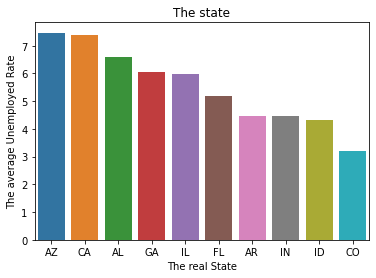

In [ ]:
ax=sns.barplot(x="The real State", y="The average Unemployed Rate", data=dfeda01.sort_values('The average Unemployed Rate',ascending=False))  # use the head(5) to show the first 5 rows

ax.set_ylabel('The average Unemployed Rate')   # set a y label
ax.set_title('The state')  # set a title

## The correlation of crime and unemployed rate,table and plot

Recode the unemployed rate to level 1,2,3,4

In [ ]:
df1['Unemployed Rate'].describe()  # see the statistics summary of the unemployed rate

count    2247.000000
mean        5.207521
std         1.822625
min         1.600000
25%         4.000000
50%         4.900000
75%         6.100000
max        24.200000
Name: Unemployed Rate, dtype: float64

In [ ]:
# recode the unemployed rate base on its value 
# I decide to set 1.6 as the minimum of the range, and 1 as the step
df1['Unemployed level'] = pd.cut(df1['Unemployed Rate'], bins=[1.6,2.6,3.6,4.6,float('Inf')], labels=['Level1', 'level2', 'level3','level4'])
df1# see if it works

,State_x,County_x,Sum of crimes,The real State,Key,Unemployed Rate,Sum of crime,Income,Population,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,Region,Division,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus,Unemployed level
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,952.0,39721.0,55243,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,South,East South Central,4291.0,12551.0,10596.0,9929.0,level4
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,1382.0,41286.0,207601,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,South,East South Central,13893.0,41797.0,47274.0,48148.0,level4
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,74.0,29264.0,22586,1,7,AL,Bibb County,4099,3194,5004,20.1,15.7,24.5,1263,976,1550,27.5,21.3,33.7,892,683,1101,26.8,20.5,33.1,43079,38896,47262,South,East South Central,3386.0,7256.0,3848.0,1678.0,level4
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,2155.0,31470.0,57494,1,9,AL,Blount County,8033,6506,9560,14.1,11.4,16.8,2568,1998,3138,19.4,15.1,23.7,1744,1324,2164,17.6,13.4,21.8,47213,43017,51409,South,East South Central,7763.0,13299.0,13519.0,5210.0,level4
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,673.0,34401.0,114973,1,15,AL,Calhoun County,19057,16226,21888,17.1,14.6,19.6,6313,5189,7437,25.7,21.1,30.3,4397,3556,5238,24.2,19.6,28.8,41778,38806,44750,South,East South Central,12315.0,25940.0,26233.0,14620.0,level4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,162.0,45863.0,9982,56,35,WY,Sublette County,646,499,793,6.7,5.2,8.2,152,107,197,6.6,4.7,8.5,96,63,129,5.8,3.8,7.8,72198,64425,79971,West,Mountain,273.0,2358.0,2626.0,1551.0,level4
2243,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,280.0,48075.0,44222,56,37,WY,Sweetwater County,4264,3610,4918,9.8,8.3,11.3,1073,790,1356,9.2,6.8,11.6,614,414,814,7.2,4.9,9.5,74546,68674,80418,West,Mountain,2017.0,9239.0,10415.0,6291.0,level4
2244,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,124.0,39613.0,20682,56,41,WY,Uinta County,2183,1738,2628,10.6,8.4,12.8,681,498,864,11.3,8.3,14.3,420,293,547,9.6,6.7,12.5,64713,57915,71511,West,Mountain,941.0,5383.0,4562.0,2078.0,level4
2245,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,28.0,42129.0,8165,56,43,WY,Washakie County,1060,855,1265,13.1,10.6,15.6,289,215,363,15.2,11.3,19.1,178,122,234,12.5,8.6,16.4,49533,44889,54177,West,Mountain,568.0,1650.0,2031.0,1297.0,level4


In [ ]:
dfeda02=df1.groupby(['Unemployed level'],as_index=True)['Sum of crimes'].mean().to_frame('The average crime counts').reset_index().head(10)  # see the first 10 states with the highest average unemployed rate
dfeda02

,Unemployed level,The average crime counts
0,Level1,109.282051
1,level2,353.953333
2,level3,514.419414
3,level4,540.057489


Text(0.5, 1.0, 'The correlation of crime and unemployed rate')

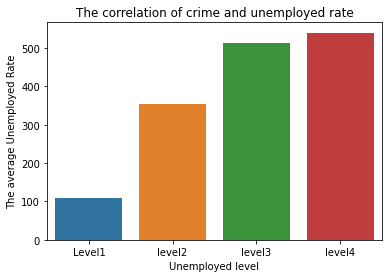

In [ ]:
ax=sns.barplot(x="Unemployed level", y="The average crime counts", data=dfeda02.sort_values('The average crime counts',ascending=False))  # use the head(5) to show the first 5 rows

ax.set_ylabel('The average Unemployed Rate')   # set a y label
ax.set_title('The correlation of crime and unemployed rate')  # set a title

##Education level by Region

In [ ]:
# education levels
dfedu = df1[['Sum of crimes',"Region",'No High School Diploma',"Diploma Only","Some college","Bachelors Degree plus"]]
dfedu

,Sum of crimes,Region,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus
0,952.0,South,4291.0,12551.0,10596.0,9929.0
1,1382.0,South,13893.0,41797.0,47274.0,48148.0
2,74.0,South,3386.0,7256.0,3848.0,1678.0
3,2155.0,South,7763.0,13299.0,13519.0,5210.0
4,673.0,South,12315.0,25940.0,26233.0,14620.0
...,...,...,...,...,...,...
2242,162.0,West,273.0,2358.0,2626.0,1551.0
2243,280.0,West,2017.0,9239.0,10415.0,6291.0
2244,124.0,West,941.0,5383.0,4562.0,2078.0
2245,28.0,West,568.0,1650.0,2031.0,1297.0


In [ ]:
#summary statistics
# Bachelor's degree plus education level are higher throughout the country 
dfedu.describe()

,Sum of crimes,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus
count,2247.000000,2247.000000,2247.000000,2247.000000,2.247000e+03
mean,493.788162,8309.734757,19838.688919,21470.222964,2.199660e+04
std,520.325980,28885.056703,55583.591485,63895.769075,7.530969e+04
min,0.000000,14.000000,14.000000,20.000000,0.000000e+00
25%,95.000000,1040.500000,2985.000000,2403.500000,1.300500e+03
50%,296.000000,2509.000000,6710.000000,5539.000000,3.350000e+03
75%,730.000000,5677.500000,15568.000000,14773.500000,1.028650e+04
max,2528.000000,550911.000000,829451.000000,939477.000000,1.392515e+06


In [ ]:
# Average education per region
# The Northeast leads with higher level education
df_group = df1.groupby("Region").agg({'No High School Diploma':'mean', "Diploma Only":'mean',"Some college":'mean',"Bachelors Degree plus":'mean','Sum of crimes':"mean"})
df_group

,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus,Sum of crimes
Region,,,,,
Midwest,4535.438596,13969.215924,14616.707152,14675.364372,361.933873
Northeast,14543.666667,46162.578947,40063.929825,56448.298246,257.754386
South,8895.827747,19282.842644,19532.866853,18986.887337,590.057728
West,12890.305031,25956.094340,37317.685535,36870.726415,560.512579


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


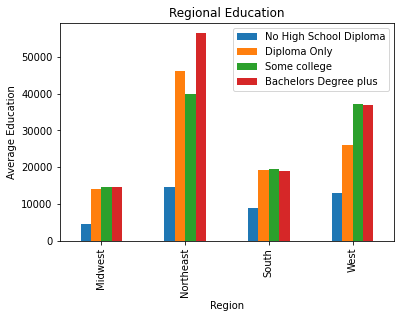

In [ ]:
#Plot average level of education by region
dfedu.groupby('Region')['No High School Diploma',"Diploma Only","Some college","Bachelors Degree plus"].mean().plot(kind='bar', ylabel="Average Education", title= "Regional Education")
plt.show() 

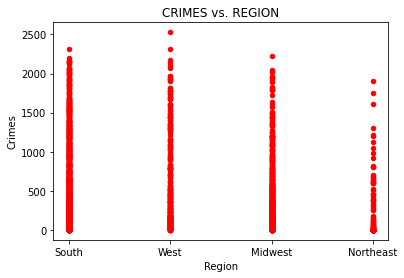

In [ ]:
# Sum of Crime by Region
dfedu.plot.scatter(x='Region', y='Sum of crimes', color='red')
plt.xlabel("Region")
plt.ylabel("Crimes")
plt.title("CRIMES vs. REGION")
plt.show()

When examining both plots the Northeast which has higher education levels shows lower crime, and the south which has lower education levels have a denser sum of crimes. 

## Relation between Personal Income and Crime

In [ ]:
# subset the columns we need
df_income = df1[['State_x','Income','Sum of crime','Population']]

In [ ]:
# check the state with lowest income, divide by population
df_top = df_income.groupby('State_x').mean().sort_values(by='Income',ascending=True).head(n=5)
df_top['Income per capita'] = round((df_top['Income']/df_top['Population']),4)
df_top['Crime per capita'] = round((df_top['Sum of crime']/df_top['Population']),5)
df_top['State'] = ['Florida','Georgia','West Virginia','South Carolina','Kentucky']
df_top

,Income,Sum of crime,Population,Income per capita,Crime per capita,State
State_x,,,,,,
FLORIDA - Nonmetropolitan Counties,29585.521739,838.304348,30799.086957,0.9606,0.02722,Florida
GEORGIA - Nonmetropolitan Counties,31539.971831,509.507042,21937.943662,1.4377,0.02322,Georgia
WEST VIRGINIA - Nonmetropolitan Counties,31573.392857,155.214286,21087.428571,1.4973,0.00736,West Virginia
SOUTH CAROLINA - Nonmetropolitan Counties,31722.647059,1055.882353,36357.705882,0.8725,0.02904,South Carolina
KENTUCKY - Nonmetropolitan Counties,31823.987805,175.317073,21998.719512,1.4466,0.00797,Kentucky


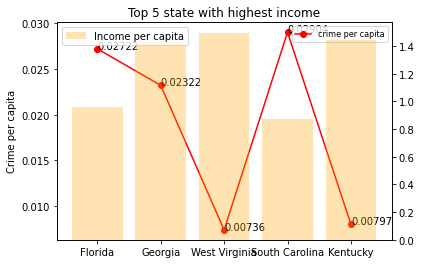

In [ ]:
a = df_top['Income per capita'] # data
b = df_top['Crime per capita']
l = [i for i in range(5)] # five state

lx = df_top['State']

fig = plt.figure()
ax1 = fig.add_subplot(111) # create subplot
ax1.plot(l, b, 'or-', label='crime per capita');  # line plot
for i ,(_x,_y) in enumerate(zip(l,b)):
  plt.text(_x,_y,b[i],color='black',fontsize=10,) # show the number of the spot in the plot
ax1.legend(loc=1)
ax1.set_ylabel('Crime per capita');
plt.legend(prop={'size':8}) # format

ax2 = ax1.twinx() # make 2 plot into 1 
plt.bar(l, a, alpha=0.3, color='orange', label='Income per capita') # bar plot
ax2.legend(loc=2)

plt.xticks(l,lx)
plt.title('Top 5 state with highest income')
plt.show() # from the plot we can see that the usually the state with higher income per capita will have lower crime

## Relation between crime and population

In [ ]:
dfp=df1.groupby(['The real State'],as_index=True)['Population'].mean().to_frame('Average Population').reset_index().head(10)  # see the first 10 states with the highest average population
dfp.sort_values('Average Population',ascending=False) # rank the dataset from the top to bottom

,The real State,Average Population
2,AZ,654387.500000
3,CA,382631.162791
5,FL,289291.800000
8,IL,144318.614458
4,CO,89556.395349
0,AL,86174.961538
9,IN,77307.264706
6,GA,61215.954198
1,AR,42402.294118
7,ID,36937.023256


In [ ]:
dfc=df1.groupby(['The real State'],as_index=True)['Sum of crime'].mean().to_frame('Average Sum of crime').reset_index().head(10)  # see the first 10 states with the highest average number of crimes
dfc.sort_values('Average Sum of crime',ascending=False) # rank the dataset from the top to bottom

,The real State,Average Sum of crime
5,FL,1063.350000
3,CA,1058.465116
2,AZ,1052.500000
0,AL,833.980769
9,IN,608.235294
6,GA,607.503817
1,AR,518.779412
4,CO,462.860465
8,IL,385.373494
7,ID,297.790698


In [ ]:
dfcp =pd.merge(dfp,dfc,on='The real State') # join the dataset
dfcp

,The real State,Average Population,Average Sum of crime
0,AL,86174.961538,833.980769
1,AR,42402.294118,518.779412
2,AZ,654387.500000,1052.500000
3,CA,382631.162791,1058.465116
4,CO,89556.395349,462.860465
5,FL,289291.800000,1063.350000
6,GA,61215.954198,607.503817
7,ID,36937.023256,297.790698
8,IL,144318.614458,385.373494
9,IN,77307.264706,608.235294


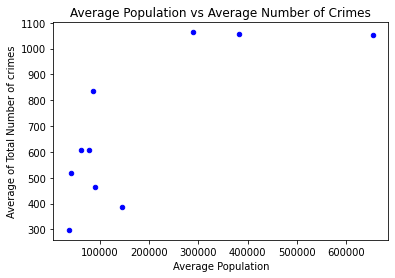

In [ ]:
dfcp.plot.scatter(x='Average Population', y='Average Sum of crime', color='blue') # generate scatterplot
plt.xlabel('Average Population') # x-axis label
plt.ylabel('Average of Total Number of crimes') # y-axis label
plt.title('Average Population vs Average Number of Crimes') # title of scatterplot
plt.show() # remove text in the beginning

# Modeling (25 pts)
Your target variable will be the sum of all crimes (make a new column that is the sum of all crime-related columns in crime2016.csv). Do not use the individual crimes as prediction variables (this is data leakage!)

Data splitting will be a simple 80/20 holdout sample with your group number as the random_state (random seed). Please use whatever preprocessing you think is appropriate for Model 1 and 2 (i.e. scaling and feature engineering are expected). 

You must fit three different types of models:

(8 pts) Model 1: a baseline linear regression with all variables (the kitchen sink model.)

(8 pts) Model 2: a ML model with hyperparameter tuning and all variables.
Choose gradient boosting or random forest and do a reasonable grid search over all relevant parameters. This will help cut down on modeling.

(7 pts) Model 3: autoML with all variables! Let’s see if autoML is better at modeling than you. Copy and paste the best fitting pipeline into your script. You can play with the hyperparameters so that it doesn’t run forever, but the defaults are pretty good.


##(8 pts) Model 1: a baseline linear regression with all variables (the kitchen sink model.)

### Modeling: Define $X$ and $y$
`y = 'Sum of crimes'`

`X = all other columns`

#### import packages

In [ ]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
# functions for splitting and normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

# regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Ridge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV

# LASSO
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import cross_val_score

# stats model
import statsmodels.api as sm

# random forest
from sklearn.ensemble import RandomForestRegressor

from pylab import *


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### prepare the data

In [ ]:
df1

,State_x,County_x,Sum of crimes,The real State,Key,Unemployed Rate,Sum of crime,Income,Population,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,Region,Division,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus,Unemployed level
0,ALABAMA - Metropolitan Counties,Autauga,952.0,AL,AutaugaAL,5.1,952.0,39721.0,55243,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,South,East South Central,4291.0,12551.0,10596.0,9929.0,level4
1,ALABAMA - Metropolitan Counties,Baldwin,1382.0,AL,BaldwinAL,5.4,1382.0,41286.0,207601,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,South,East South Central,13893.0,41797.0,47274.0,48148.0,level4
2,ALABAMA - Metropolitan Counties,Bibb,74.0,AL,BibbAL,6.5,74.0,29264.0,22586,1,7,AL,Bibb County,4099,3194,5004,20.1,15.7,24.5,1263,976,1550,27.5,21.3,33.7,892,683,1101,26.8,20.5,33.1,43079,38896,47262,South,East South Central,3386.0,7256.0,3848.0,1678.0,level4
3,ALABAMA - Metropolitan Counties,Blount,2155.0,AL,BlountAL,5.4,2155.0,31470.0,57494,1,9,AL,Blount County,8033,6506,9560,14.1,11.4,16.8,2568,1998,3138,19.4,15.1,23.7,1744,1324,2164,17.6,13.4,21.8,47213,43017,51409,South,East South Central,7763.0,13299.0,13519.0,5210.0,level4
4,ALABAMA - Metropolitan Counties,Calhoun,673.0,AL,CalhounAL,6.6,673.0,34401.0,114973,1,15,AL,Calhoun County,19057,16226,21888,17.1,14.6,19.6,6313,5189,7437,25.7,21.1,30.3,4397,3556,5238,24.2,19.6,28.8,41778,38806,44750,South,East South Central,12315.0,25940.0,26233.0,14620.0,level4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,WYOMING - Nonmetropolitan Counties,Sublette,162.0,WY,SubletteWY,6.5,162.0,45863.0,9982,56,35,WY,Sublette County,646,499,793,6.7,5.2,8.2,152,107,197,6.6,4.7,8.5,96,63,129,5.8,3.8,7.8,72198,64425,79971,West,Mountain,273.0,2358.0,2626.0,1551.0,level4
2243,WYOMING - Nonmetropolitan Counties,Sweetwater,280.0,WY,SweetwaterWY,6.1,280.0,48075.0,44222,56,37,WY,Sweetwater County,4264,3610,4918,9.8,8.3,11.3,1073,790,1356,9.2,6.8,11.6,614,414,814,7.2,4.9,9.5,74546,68674,80418,West,Mountain,2017.0,9239.0,10415.0,6291.0,level4
2244,WYOMING - Nonmetropolitan Counties,Uinta,124.0,WY,UintaWY,5.8,124.0,39613.0,20682,56,41,WY,Uinta County,2183,1738,2628,10.6,8.4,12.8,681,498,864,11.3,8.3,14.3,420,293,547,9.6,6.7,12.5,64713,57915,71511,West,Mountain,941.0,5383.0,4562.0,2078.0,level4
2245,WYOMING - Nonmetropolitan Counties,Washakie,28.0,WY,WashakieWY,4.8,28.0,42129.0,8165,56,43,WY,Washakie County,1060,855,1265,13.1,10.6,15.6,289,215,363,15.2,11.3,19.1,178,122,234,12.5,8.6,16.4,49533,44889,54177,West,Mountain,568.0,1650.0,2031.0,1297.0,level4


In [ ]:
#subsetting the data
# assign y to the target variable
y = df1['Sum of crimes']

#assign X to our explanatory variables!
X = df1.drop('State_x', axis=1)
#keep overwrite !!!!!!1
X = X.drop('Sum of crimes', axis=1)
X = X.drop('County_x', axis=1)
X = X.drop('Sum of crime', axis=1)  # remove the sum of crime, no s
X = X.drop('The real State', axis=1)
X = X.drop('Key', axis=1)
X = X.drop('Name', axis=1)
X = X.drop('State FIPS Code', axis=1)
X = X.drop('County FIPS Code', axis=1)
X = X.drop('Postal Code', axis=1)
X = X.drop('Region', axis=1)
X = X.drop('Division', axis=1)
X = X.drop('Unemployed level', axis=1)

	

# change all the variable into numeric

X['Poverty Estimate, All Ages']=pd.to_numeric(X['Poverty Estimate, All Ages'],errors='coerce') 
X['90% CI Lower Bound']=pd.to_numeric(X['90% CI Lower Bound'],errors='coerce') 
X['90% CI Upper Bound']=pd.to_numeric(X['90% CI Upper Bound'],errors='coerce') 
X['90% CI Lower Bound.1']=pd.to_numeric(X['90% CI Lower Bound.1'],errors='coerce') 
X['90% CI Upper Bound.1']=pd.to_numeric(X['90% CI Upper Bound.1'],errors='coerce') 
X['Poverty Estimate, Age 0-17']=pd.to_numeric(X['Poverty Estimate, Age 0-17'],errors='coerce') 
X['90% CI Lower Bound.2']=pd.to_numeric(X['90% CI Lower Bound.2'],errors='coerce') 
X['90% CI Upper Bound.2']=pd.to_numeric(X['90% CI Upper Bound.2'],errors='coerce') 
X['Poverty Percent, Age 0-17']=pd.to_numeric(X['Poverty Percent, Age 0-17'],errors='coerce') 
X['90% CI Lower Bound.3']=pd.to_numeric(X['90% CI Lower Bound.3'],errors='coerce') 
X['90% CI Upper Bound.3']=pd.to_numeric(X['90% CI Upper Bound.3'],errors='coerce') 
X['Poverty Estimate, Age 5-17 in Families']=pd.to_numeric(X['Poverty Estimate, Age 5-17 in Families'],errors='coerce') 
X['90% CI Lower Bound.4']=pd.to_numeric(X['90% CI Lower Bound.4'],errors='coerce') 
X['90% CI Upper Bound.4']=pd.to_numeric(X['90% CI Upper Bound.4'],errors='coerce') 
X['Poverty Percent, Age 5-17 in Families']=pd.to_numeric(X['Poverty Percent, Age 5-17 in Families'],errors='coerce') 
X['90% CI Lower Bound.5']=pd.to_numeric(X['90% CI Lower Bound.5'],errors='coerce') 
X['90% CI Upper Bound.5']=pd.to_numeric(X['90% CI Upper Bound.5'],errors='coerce') 
X['Median Household Income']=pd.to_numeric(X['Median Household Income'],errors='coerce') 
X['90% CI Lower Bound.6']=pd.to_numeric(X['90% CI Lower Bound.6'],errors='coerce') 
X['90% CI Upper Bound.6']=pd.to_numeric(X['90% CI Upper Bound.6'],errors='coerce') 



#X = X.drop('Unemployed Rate', axis=1)  # KEEP THE explanatory variable



#,'State','County_x','The real State','Key','County_y','State abbr','Unemployed level'
print(X.shape, y.shape)


(2247, 28) (2247,)


In [ ]:
X.info()# see if all in the correct datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2246
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unemployed Rate                         2247 non-null   float64
 1   Income                                  2247 non-null   float64
 2   Population                              2247 non-null   int64  
 3   Poverty Estimate, All Ages              2247 non-null   int64  
 4   90% CI Lower Bound                      2247 non-null   int64  
 5   90% CI Upper Bound                      2247 non-null   int64  
 6   Poverty Percent, All Ages               2247 non-null   object 
 7   90% CI Lower Bound.1                    2247 non-null   float64
 8   90% CI Upper Bound.1                    2247 non-null   float64
 9   Poverty Estimate, Age 0-17              2247 non-null   int64  
 10  90% CI Lower Bound.2                    2247 non-null   int6

### Modeling: Split data using an 80/20 random split. Use a random_state so that you can repeat your work.

In [ ]:
# splitting the data on 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,  # set size to 20% test, 80% as training
                                                    shuffle = True,
                                                    random_state = 5)# our group number is 5

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  # see the shape of the train and the test

(1797, 28) (450, 28) (1797,) (450,)


### Modeling: Fit a linear regression

In [ ]:
X.apply(pd.to_numeric, errors='coerce')   # change it to numeric again
X.info()# see if all the data type are correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2246
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unemployed Rate                         2247 non-null   float64
 1   Income                                  2247 non-null   float64
 2   Population                              2247 non-null   int64  
 3   Poverty Estimate, All Ages              2247 non-null   int64  
 4   90% CI Lower Bound                      2247 non-null   int64  
 5   90% CI Upper Bound                      2247 non-null   int64  
 6   Poverty Percent, All Ages               2247 non-null   object 
 7   90% CI Lower Bound.1                    2247 non-null   float64
 8   90% CI Upper Bound.1                    2247 non-null   float64
 9   Poverty Estimate, Age 0-17              2247 non-null   int64  
 10  90% CI Lower Bound.2                    2247 non-null   int6

In [ ]:
# convert to numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
#scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [ ]:
#Linear regression
LR = LinearRegression()
LR = LR.fit(X_train, y_train) # fit model

In [ ]:
#model
model = sm.OLS(y_train,X_train)
#fit model
results = model.fit()
# evaluation
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.402
Method:                 Least Squares   F-statistic:                     58.49
Date:                Sat, 04 Dec 2021   Prob (F-statistic):          3.92e-185
Time:                        01:08:02   Log-Likelihood:                -13334.
No. Observations:                1797   AIC:                         2.671e+04
Df Residuals:                    1775   BIC:                         2.683e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -122.4067    124.974     -0.979      0.327    -367.518     122.705
x2          -922.4969    193.618     -4.765      0.000   -1302.240    -542.754
x3         -4440.9777    935.266     -4.748      0.000   -6275.316   -2606.639
x4          5890.0228    777.382      7.577      0.000    4365.342    7414.704
x5         -1.363e+05   1.84e+04     -7.402      0.000   -1.72e+05      -1e+05
x6          1.401e+05   1.84e+04      7.604      0.000    1.04e+05    1.76e+05
x7         -1501.7929    178.964     -8.392      0.000   -1852.795   -1150.791
x8          5144.6730    754.939      6.815      0.000    3664.011    6625.335
x9         -5689.3098    744.502     -7.642      0.000   -7149.502   -4229.117
x10        -9578.9877   4428.721     -2.163      0.031   -1.83e+04    -892.931
x11        -4.462e+04   3.68e+04     -1.212      0.226   -1.17e+05    2.76e+04
x12         2.242e+04   3.96e+04      0.566      0.571   -5.52e+04       1e+05
x13          747.8794    284.170      2.632      0.009     190.537    1305.221
x14         -641.2951   1659.005     -0.387      0.699   -3895.103    2612.513
x15         1756.7472   1598.308      1.099      0.272   -1378.017    4891.512
x16         5287.8642   4351.159      1.215      0.224   -3246.069    1.38e+04
x17         8.975e+04   2.87e+04      3.122      0.002    3.34e+04    1.46e+05
x18        -7.116e+04   3.19e+04     -2.229      0.026   -1.34e+05   -8535.226
x19        -2.307e+05    9.5e+04     -2.428      0.015   -4.17e+05   -4.44e+04
x20          1.01e+05   4.19e+04      2.410      0.016    1.88e+04    1.83e+05
x21         1.292e+05   5.33e+04      2.424      0.015    2.47e+04    2.34e+05
x22          289.4088     65.735      4.403      0.000     160.482     418.336
x23         2405.5288    782.806      3.073      0.002     870.210    3940.847
x24        -1746.6060    754.978     -2.313      0.021   -3227.346    -265.866
x25          107.3443    995.503      0.108      0.914   -1845.137    2059.826
x26        -6267.6708   1019.023     -6.151      0.000   -8266.281   -4269.060
x27         8097.2199   1037.955      7.801      0.000    6061.478    1.01e+04
x28        -2937.4208    992.255     -2.960      0.003   -4883.533    -991.309
==============================================================================
Omnibus:                      248.848   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              837.038
Skew:                           0.676   Prob(JB):                    1.74e-182
Kurtosis:                       6.058   Cond. No.                     1.09e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-29. This might indic

In [ ]:
# predictions, we will need this later
train_preds_LR = LR.predict(X_train) # predict training data
test_preds_LR = LR.predict(X_test) #pred the test data

##(8 pts) Model 2: a ML model with hyperparameter tuning and all variables.
Choose gradient boosting or random forest and do a reasonable grid search over all relevant parameters. This will help cut down on modeling.

### Create pipeline

In [ ]:
pipe_rf = Pipeline([('scl', StandardScaler()),  # create a pipeline for the randomforest
			('clf', RandomForestRegressor(random_state=5))])   # set the random seed!!

### Define the parameters for grid search

In [ ]:
#Random forest
grid_params_rf = [{
                  'clf__min_samples_leaf': [1, 5],
                  'clf__max_depth': [5, 10],
                  'clf__min_samples_split': [2, 5],
                  'clf__n_estimators': [50, 100]}]

# overwrite it , take toooooooo long to run
grid_params_rf = [{'clf__n_estimators': [50, 100],
                   'clf__min_samples_split': [2, 5]}]                 
# if we put too many parameter, it could run 5-10 mins!!!
# here we run different parameters, if we use the first grid, it take too much time to fit the model
# in order to make it more efficiency, we use the second grid overwirte the first one in our final version, use less parameters to fit the model

### Define grid seach

In [ ]:
gs_rf = GridSearchCV(estimator=pipe_rf,  # defind the grid search
    param_grid=grid_params_rf,
    scoring='neg_median_absolute_error',
    cv=10)

# list for the pipelines
grids = [gs_rf]

# dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'gs_rf'}

# import MAE
from sklearn.metrics import median_absolute_error

###Run the search!!

This code should run about 40s

In [ ]:
# Fit the grid search objects
print('Performing model optimizations...')
best_err = np.inf
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train, y_train)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data error
	print('Best training error: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test)
  
	# Test data error of model with best params 


# we can use median_absolute_error!
	print('Test set error score for best params: %.3f ' % median_absolute_error(y_test, y_pred))
	# Track best (lowest test error) model
	if median_absolute_error(y_test, y_pred) < best_err: #updated: April 8, 2021 (4 PM)
		best_err = median_absolute_error(y_test, y_pred)
		best_gs = gs
		best_clf = idx
print('\nModel with best test set error: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: gs_rf
Best params: {'clf__min_samples_split': 2, 'clf__n_estimators': 50}
Best training error: -133.091
Test set error score for best params: 125.310 

Model with best test set error: gs_rf


Performing model optimizations...

Estimator: gs_rf
Best params: {'clf__min_samples_split': 2, 'clf__n_estimators': 50}
Best training error: -133.091
Test set error score for best params: 125.310 

Model with best test set error: gs_rf

##(7 pts) Model 3: autoML with all variables!
 Let’s see if autoML is better at modeling than you. Copy and paste the best fitting pipeline into your script. You can play with the hyperparameters so that it doesn’t run forever, but the defaults are pretty good.


First ! import autosklearn

In [ ]:
# import tpot
!pip install tpot

     |████████████████████████████████| 87 kB 4.7 MB/s 
     |████████████████████████████████| 173.5 MB 9.9 kB/s 
     |████████████████████████████████| 160 kB 83.6 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=d3881165d0d47a56a2a1b7b797fcb4a84dd1ee784d3ff1a7954515ebf870f2ab
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
# import regressor function 
from tpot import TPOTRegressor
import time


In [ ]:
# Construct and fit TPOT classifier
start_time = time.time()
# use generations=1 to save time 
tpot = TPOTRegressor(generations=1, verbosity=2, scoring='neg_mean_absolute_error',random_state=5)
tpot.fit(X_train, y_train)
end_time = time.time()

# Results
print('TPOT regressor finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test neg(MAE): %.3f' % tpot.score(X_test, y_test))

# Save best pipeline as Python script file
tpot.export('tpot_CrimeRegressor_pipeline.py') # look left!

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -229.2388851681413

Best pipeline: ExtraTreesRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=14, min_samples_split=8, n_estimators=100)
TPOT regressor finished in 523.2321779727936 seconds
Best pipeline test neg(MAE): -239.725


In [ ]:
from sklearn.metrics import mean_absolute_error
#IMPORT mae


Set seed as 5

Generation 1 - Current best internal CV score: -229.2388851681413

Best pipeline: ExtraTreesRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=14, min_samples_split=8, n_estimators=100)
TPOT regressor finished in 616.092089176178 seconds
Best pipeline test neg(MAE): -239.725

In [ ]:
# this is from the .py file
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator, ZeroCount

# NOTE: Make sure that the outcome column is labeled 'target' in the data file

# make sure we update the paths!
tpot_data = df1

# RENAME THE TARGET VARIABLE!
# this is not included in the TPOT output!
tpot_data.rename(columns={'Sum of crimes' : 'target'}, inplace=True)

X= tpot_data.drop('target', axis=1)


#keep overwrite !!!!!!

X = X.drop('County_x', axis=1)
X = X.drop('Sum of crime', axis=1)  # remove the sum of crime, no s
X = X.drop('The real State', axis=1)
X = X.drop('Key', axis=1)
#X = X.drop('Unemployed Rate', axis=1)  # KEEP THE explanatory variable


X = X.drop('Unemployed level', axis=1)

X = X.drop('State_x', axis=1)


# drop all the variables that we will not use
X = X.drop('Name', axis=1)
X = X.drop('State FIPS Code', axis=1)
X = X.drop('County FIPS Code', axis=1)
X = X.drop('Postal Code', axis=1)
X = X.drop('Region', axis=1)
X = X.drop('Division', axis=1)

# assgin features to X
features = X

training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=5)

#bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=14, min_samples_split=8, n_estimators=100

#copy and paste the above data 
exported_pipeline = make_pipeline(
    ZeroCount(),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.7500000000000001, 
                                                    min_samples_leaf=14, min_samples_split=8, n_estimators=100)),
    LassoLarsCV(normalize=False)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)
results1 = exported_pipeline.predict(training_features)# add a training
print(mean_absolute_error(testing_target, results))
print(mean_absolute_error(training_target, results1)) # for the results 



#results is just a vector - you can make scatterplots and calculate error metrics.

239.62391194844426
202.26707475673538


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:687: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 31 iterations, alpha=1.549e+03, previous alpha=1.549e+03, with an active set of 14 regressors.
  ConvergenceWarning,


# Error Metrics (5 pts)
Depending on the models you fit… 
Regression: scatterplot of actual (X) vs. predicted (Y) values along with appropriate error metrics (R2, MSE, MAE, bias, MAPE) for each partition (train and test)
Bullet points that describe what you see in the metrics or graphics - which is the ‘best’ performing model? 
You are encouraged to analyze your results by State - are certain States easier to predict than other States?



### plots

### AUTOML testing

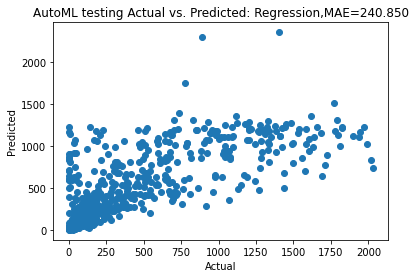

In [ ]:
# make a scatterplot of the autoML
plt.scatter(x=testing_target, y=results)
plt.xlabel('Actual')  # label for x
plt.ylabel('Predicted')# label for y
plt.title('AutoML testing Actual vs. Predicted: Regression,MAE=240.850') # title
plt.show()

### RandomForest testing

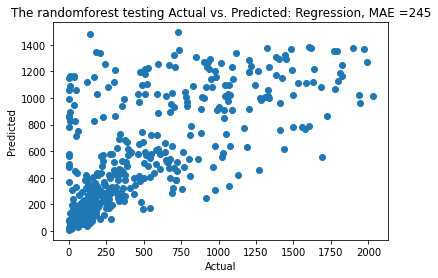

In [ ]:
# make a scatterplot of the randomtree
plt.scatter(y=y_pred, x=y_test)
plt.xlabel('Actual')# label for x
plt.ylabel('Predicted')# label for y
plt.title('The randomforest testing Actual vs. Predicted: Regression, MAE =245')# title
plt.show()
# seems that the higher the number, the lower the accuracy of the prediction?

### Linear testing

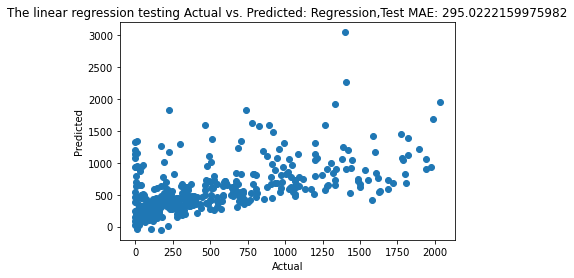

In [ ]:
# make a scatterplot of the linear regression

plt.scatter(x=y_test,y=test_preds_LR)
plt.xlabel('Actual')# label for x
plt.ylabel('Predicted')# label for y
plt.title('The linear regression testing Actual vs. Predicted: Regression,Test MAE: 295.0222159975982')# title
plt.show()

#train_preds_LR = LR.predict(X_train) # predict training data
#test_preds_LR = LR.predict(X_test) #pred the test data


### AUTOML training

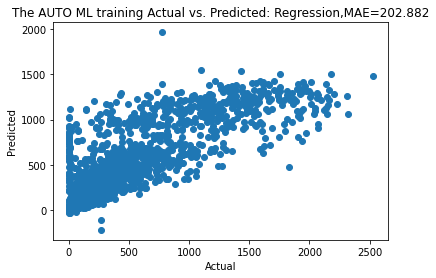

In [ ]:
# make a scatterplot of the autoML
#training_features, testing_features, training_target, testing_target
plt.scatter(x=training_target, y=results1)
plt.xlabel('Actual')# label for x
plt.ylabel('Predicted')# label for y
plt.title('The AUTO ML training Actual vs. Predicted: Regression,MAE=202.882')# title
plt.show()
# this one looks pretty good

### RandomForest training

In [ ]:
tpot_data = df1

# RENAME THE TARGET VARIABLE!
# this is not included in the TPOT output!
tpot_data.rename(columns={'Sum of crimes' : 'target'}, inplace=True)

X= tpot_data.drop('target', axis=1)


#keep overwrite !!!!!!

X = X.drop('County_x', axis=1)
X = X.drop('Sum of crime', axis=1)  # remove the sum of crime, no s
X = X.drop('The real State', axis=1)
X = X.drop('Key', axis=1)
#X = X.drop('Unemployed Rate', axis=1)  # KEEP THE explanatory variable


X = X.drop('Unemployed level', axis=1)

X = X.drop('State_x', axis=1)


# remove all the variables that we will not use
X = X.drop('Name', axis=1)
X = X.drop('State FIPS Code', axis=1)
X = X.drop('County FIPS Code', axis=1)
X = X.drop('Postal Code', axis=1)
X = X.drop('Region', axis=1)
X = X.drop('Division', axis=1)

# assgin features to X
features = X

training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=5)



#min_samples_split': 2, 'clf__n_estimators': 50


#copy and paste the above data 
exported_pipeline1 = make_pipeline(
    ZeroCount(),
    StackingEstimator(estimator=RandomForestRegressor(min_samples_split=2,
                                   n_estimators=50)),
    LassoLarsCV(normalize=False)
)

exported_pipeline1.fit(training_features, training_target)
results = exported_pipeline1.predict(testing_features)
results1 = exported_pipeline1.predict(training_features)# add a training
print(mean_absolute_error(testing_target, results))
print(mean_absolute_error(training_target, results1)) # for the results 



#results is just a vector - you can make scatterplots and calculate error metrics.

247.91384751064402
74.71176194555946


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_least_angle.py:687: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 48 iterations, alpha=2.061e+00, previous alpha=1.574e+00, with an active set of 21 regressors.
  ConvergenceWarning,


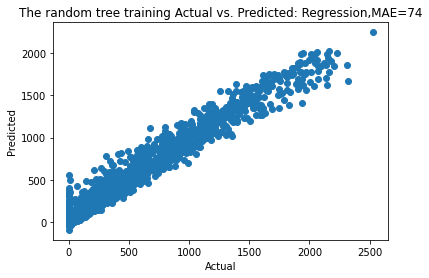

In [ ]:
# make a scatterplot of the random tree
#training_features, testing_features, training_target, testing_target
plt.scatter(x=training_target, y=results1)
plt.xlabel('Actual')# label for x
plt.ylabel('Predicted')# label for y
plt.title('The random tree training Actual vs. Predicted: Regression,MAE=74') #title
plt.show()

### Linear               training 

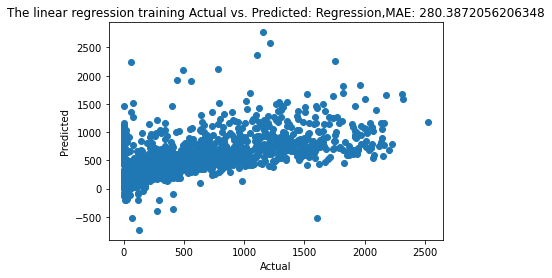

In [ ]:
# make a scatterplot of the linear regression

plt.scatter(x=y_train,y=train_preds_LR)
plt.xlabel('Actual') # label for x
plt.ylabel('Predicted') # label for y
plt.title('The linear regression training Actual vs. Predicted: Regression,MAE: 280.3872056206348')# title
plt.show()

#train_preds_LR = LR.predict(X_train) # predict training data
#test_preds_LR = LR.predict(X_test) #pred the test data


###conclusion

From the actual vs predicted plots we can see that there is no a huge different between them. 

However, from the plot of the random forest we find that there are less dots in the upper left ares. And seems like more dots are concentrate on the right side of the plot.

The ExtraTreesRegressor have the lowest MAE value ( we use the negative of it, so if it closer to 0, it is better)

so we think that  ***The parameters that generated by the AUTOML model, which is the ExtraTreesRegressor(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=14, min_samples_split=8, n_estimators=100) have the best performance ***

# Interpretability (30 pts)



## (10 pts) Create permutation feature importance for each of the three models. Identify the top 10 important  variables in each model. What trends do you see among the models? 


In [ ]:
# import packages
from sklearn.inspection import permutation_importance

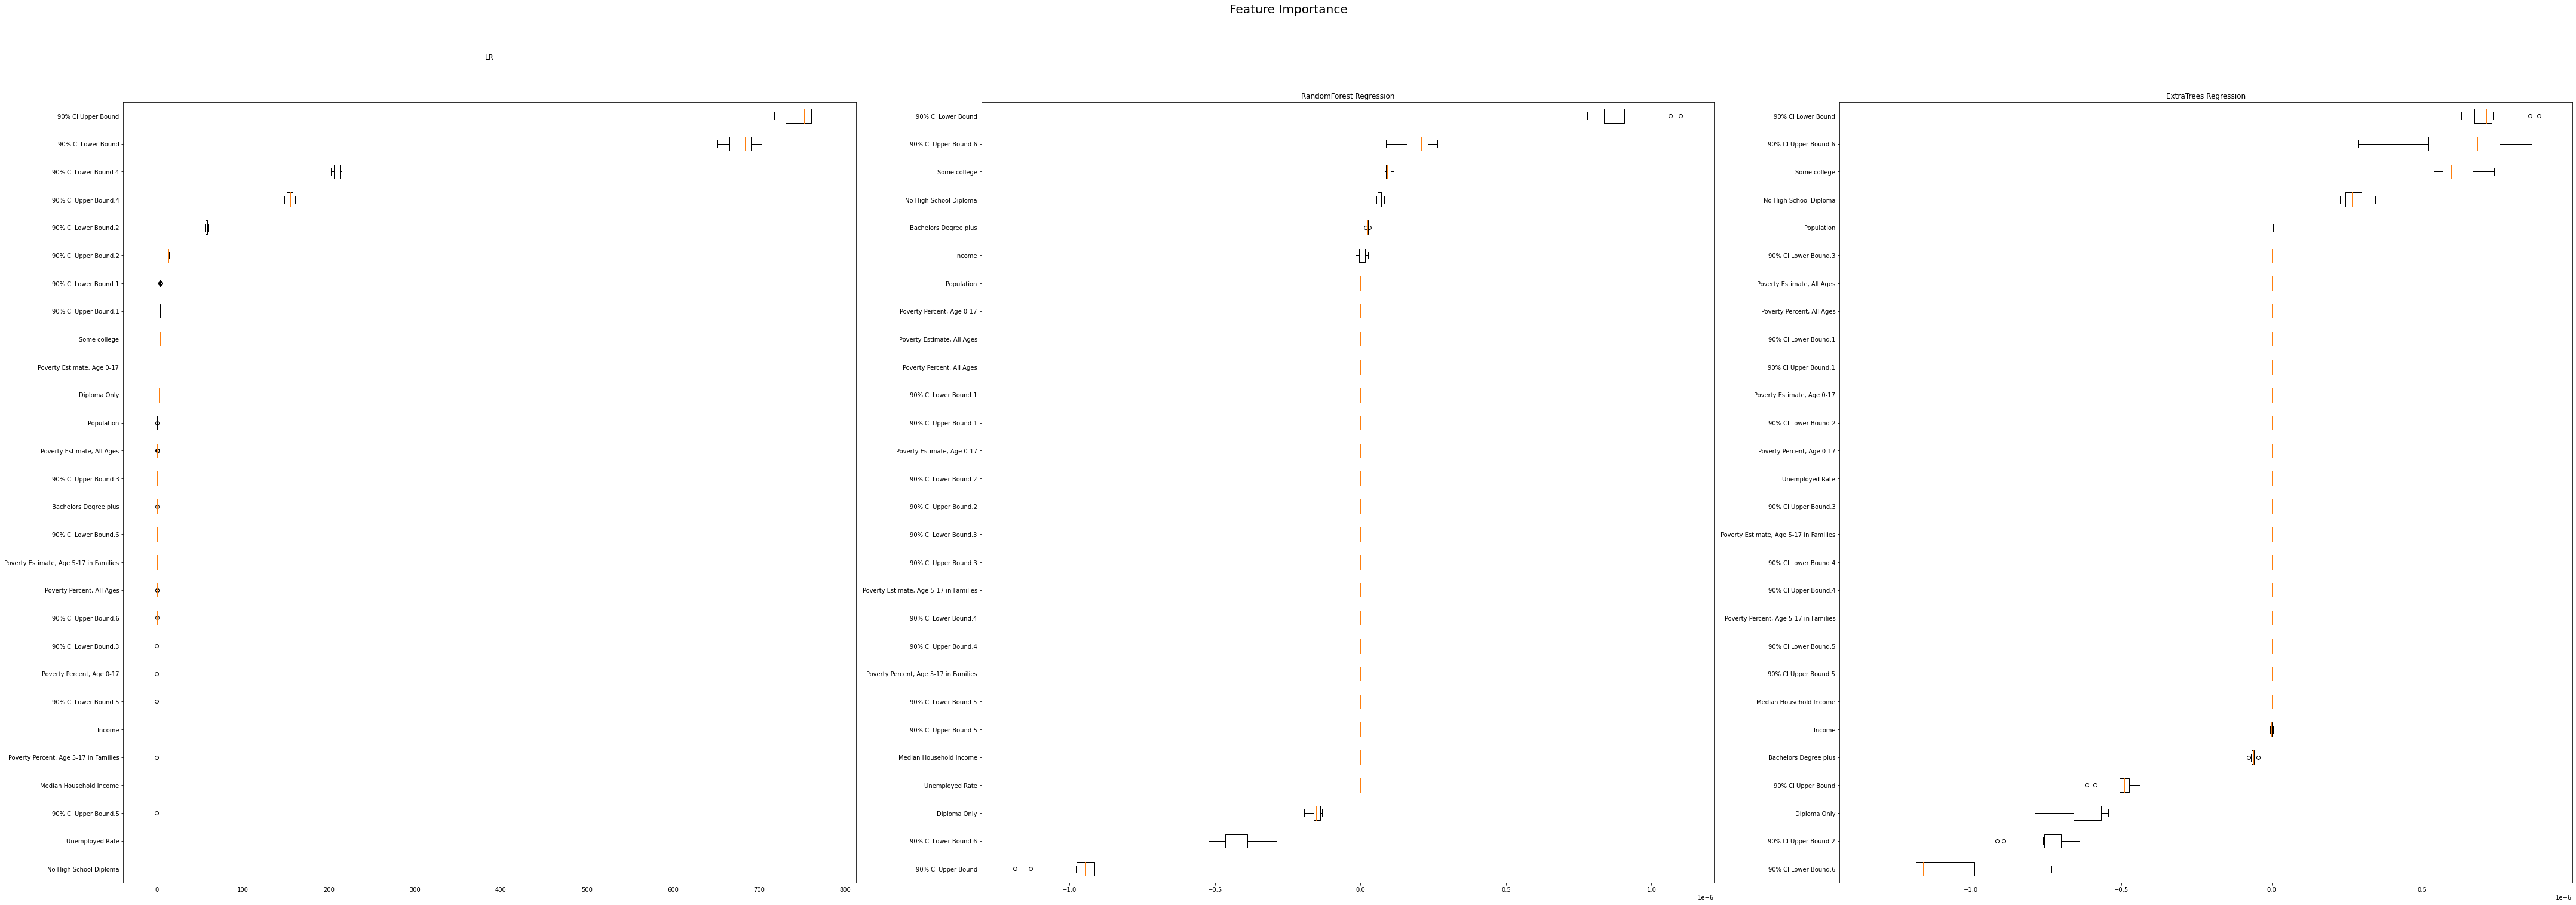

In [ ]:
# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(60, 20)) # 1 row, 3 columns
plt.suptitle('Feature Importance', y= 1.05, size = 20)

# LR
clf = LR # don't forget to update title!

result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=5)
perm_sorted_idx = result.importances_mean.argsort()
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax1.set_title('LR', y=1.05) # don't forget to update title!
fig.tight_layout()

# RFR
clf = exported_pipeline1 # don't forget to update title!

result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=5)
perm_sorted_idx = result.importances_mean.argsort()
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax2.set_title('RandomForest Regression', y=1.05) # don't forget to update title!
fig.tight_layout()

# AutoML
clf = exported_pipeline # don't forget to update title!

result = permutation_importance(clf, X_test, y_test, n_repeats=10,
                                random_state=5)
perm_sorted_idx = result.importances_mean.argsort()
ax3.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X.columns[perm_sorted_idx])
ax3.set_title('ExtraTrees Regression', y=1.05) # don't forget to update title!
fig.tight_layout()

plt.show()

From the result of the plot, the top 10 important variables in LR model is the following.

* 90% CI Upper Bound
* 90% CI Lower Bound
* 90% CI Lower Bound.4
* 90% CI Upper Bound.4
* 90% CI Lower Bound.2
* 90% CI Upper Bound.2
* 90% CI Lower Bound.1
* 90% CI Upper Bound.1
* Some college
* Poverty Estimate,Age 0-17

the top 10 important variables in RFR model is the following.
* 90% CI Upper Bound.5
* 90% CI Lower Bound.1
* 90% CI Upper Bound.2
* 90% CI Lower Bound
* 90% CI Lower Bound.3
* 90% CI Upper Bound.6
* 90% CI Lower Bound.4
* No High School Diploma
* Some college
* Bachelors Degree plus

the top 10 important variables in ETR model is the following.
* 90% CI Lpper Bound
* 90% CI Uower Bound.6
* Some college
* No High School Diploma
* Population
* 90% CI Lpper Bound.3
* Poverty Estimate, All Ages
* Poverty Percent, All Ages
* 90% CI Lpper Bound.1
* 90% CI Upper Bound.1

***From the permutation test result we can see that the most important variables in this project is those variables relate to poverty rate, college and education. These three types of data have more or less influence in each model***

## (10 pts) Create partial dependence plots for each of the three models - make a 5 row and 2 column plot for each model that shows how the ML model is treating each of your 10 important variables. What trends do you see among the models?


In [ ]:
train_X_df = pd.DataFrame(X_train, columns=X.columns)# assign it to the train data
train_X_df.head()  # see the first few head

,Unemployed Rate,Income,Population,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus
0,0.138889,0.128980,0.008605,0.006154,0.004914,0.007325,0.182022,0.177326,0.184982,0.005255,0.004143,0.006271,0.251825,0.211934,0.268634,0.005079,0.003907,0.006140,0.220870,0.183432,0.251553,0.269710,0.256386,0.282529,0.007655,0.013330,0.009153,0.005085
1,0.083333,0.217142,0.001220,0.000858,0.000690,0.001018,0.168539,0.165698,0.170330,0.000645,0.000500,0.000777,0.209854,0.172840,0.226708,0.000596,0.000454,0.000725,0.170435,0.138067,0.197205,0.236318,0.218706,0.253262,0.000692,0.001977,0.001559,0.000697
2,0.161111,0.179461,0.008002,0.006240,0.005216,0.007206,0.182022,0.188953,0.177656,0.005192,0.004339,0.005970,0.253650,0.230453,0.257764,0.004948,0.004060,0.005752,0.205217,0.185404,0.222050,0.278706,0.272354,0.284817,0.006680,0.011636,0.010617,0.005213
3,0.266667,0.106262,0.005227,0.005933,0.004758,0.007043,0.301124,0.299419,0.302198,0.004119,0.003202,0.004957,0.368613,0.306584,0.395963,0.004192,0.003229,0.005064,0.332174,0.276134,0.377329,0.142501,0.131760,0.152836,0.007143,0.009147,0.006632,0.001751
4,0.083333,0.206964,0.001464,0.001762,0.001428,0.002078,0.328090,0.328488,0.327839,0.001871,0.001501,0.002208,0.403285,0.347737,0.423913,0.001856,0.001469,0.002207,0.358261,0.305720,0.400621,0.198343,0.180990,0.215038,0.002162,0.001793,0.001337,0.000522


In [ ]:
import warnings# import some model
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

     |████████████████████████████████| 41.2 MB 1.2 MB/s 
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3639 sha256=456cd532531ff1ea59fbda49908754b886ebb6d29d75c410b87e9902c6594474
  Stored in directory: /root/.cache/pip/wheels/cc/0d/0a/06236a41d8f5c3485c1057262de55329e227a0c239fd00d0cd
Successfully built pycebox


In [ ]:

def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=5, 
                  ncols=2, figsize=(12, 12), sharex=False, sharey=True, 
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the 
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

In [ ]:
train_X_df.head()# see the head of the first few rows

,Unemployed Rate,Income,Population,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus
0,0.138889,0.128980,0.008605,0.006154,0.004914,0.007325,0.182022,0.177326,0.184982,0.005255,0.004143,0.006271,0.251825,0.211934,0.268634,0.005079,0.003907,0.006140,0.220870,0.183432,0.251553,0.269710,0.256386,0.282529,0.007655,0.013330,0.009153,0.005085
1,0.083333,0.217142,0.001220,0.000858,0.000690,0.001018,0.168539,0.165698,0.170330,0.000645,0.000500,0.000777,0.209854,0.172840,0.226708,0.000596,0.000454,0.000725,0.170435,0.138067,0.197205,0.236318,0.218706,0.253262,0.000692,0.001977,0.001559,0.000697
2,0.161111,0.179461,0.008002,0.006240,0.005216,0.007206,0.182022,0.188953,0.177656,0.005192,0.004339,0.005970,0.253650,0.230453,0.257764,0.004948,0.004060,0.005752,0.205217,0.185404,0.222050,0.278706,0.272354,0.284817,0.006680,0.011636,0.010617,0.005213
3,0.266667,0.106262,0.005227,0.005933,0.004758,0.007043,0.301124,0.299419,0.302198,0.004119,0.003202,0.004957,0.368613,0.306584,0.395963,0.004192,0.003229,0.005064,0.332174,0.276134,0.377329,0.142501,0.131760,0.152836,0.007143,0.009147,0.006632,0.001751
4,0.083333,0.206964,0.001464,0.001762,0.001428,0.002078,0.328090,0.328488,0.327839,0.001871,0.001501,0.002208,0.403285,0.347737,0.423913,0.001856,0.001469,0.002207,0.358261,0.305720,0.400621,0.198343,0.180990,0.215038,0.002162,0.001793,0.001337,0.000522


### Linear Regressor

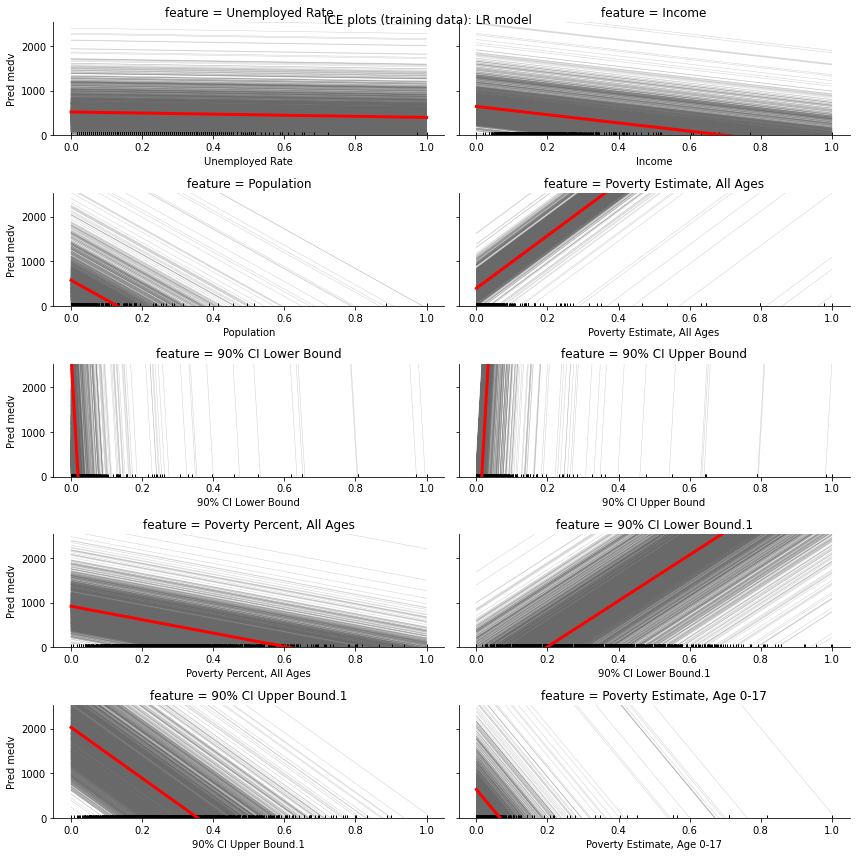

In [ ]:
# columns to plot
features = train_X_df.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=LR.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred medv', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,np.max(y_train)])
plt.suptitle('ICE plots (training data): LR model')
plt.subplots_adjust(top=0.89)  
plt.tight_layout()

***From the PDP plots we can see that some that***
* the change in the unemployment rate per unit has almost the same impact on the number of crimes at different values
* the change in income, population, 90% CI Lower Bound, Poverty Percent All age, 90% CI Upper Bound.1 and Poverty Estimate Age 0 - 17 per unit will have a lower effect on the number of crimes when the value of these variables go up
* the change in Poverty Estimate All Ages, 90% CI Upper Bound, 90% CI Lower Bound.1 per unit will have a greater effect on the number of crimes when the value of these variables go up

### RandomeForest Regressor

In [ ]:
# we use pipeline to fit RFR model before, but for some unknown reason the PDP plot result is pertty werid. So we use the same parameters and random seed to refit the model here
RFR = RandomForestRegressor(min_samples_split=2, n_estimators=50, random_state=5)  # set seed to 5 
RFR = RFR.fit(X_train, y_train)

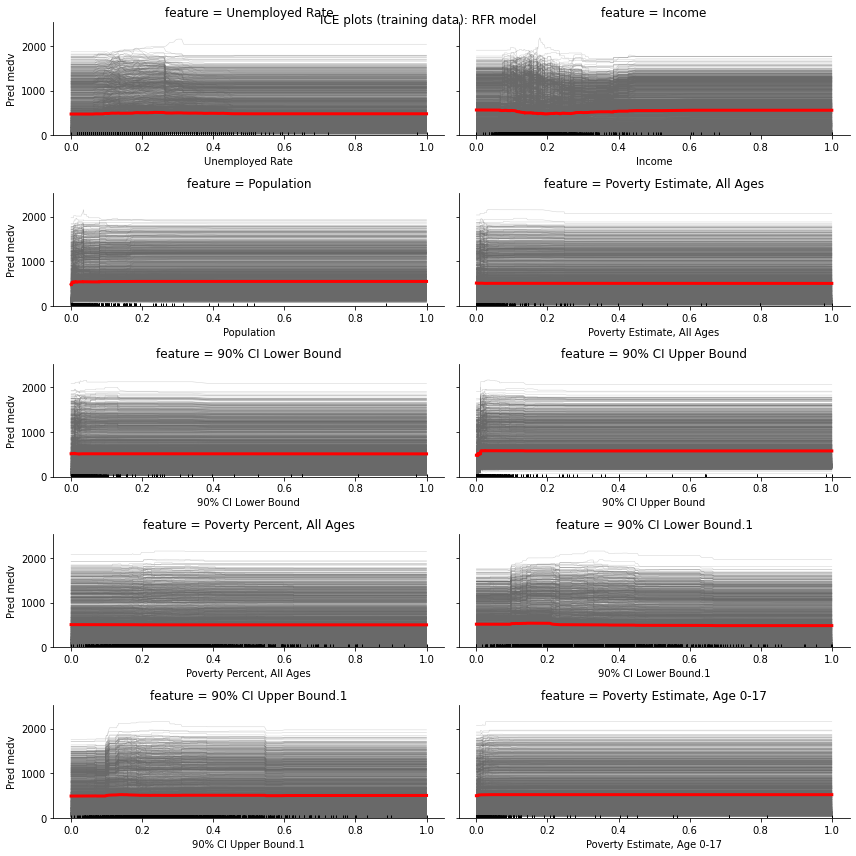

In [ ]:
# columns to plot
features = train_X_df.columns
# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=RFR.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred medv', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,np.max(y_train)])
plt.suptitle('ICE plots (training data): RFR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

***From the PDP plots we can see that some that***
* the change of all variables per unit has almost the same impact on the number of crimes at different values

### ExtraTreesRegressor

In [ ]:
# we use pipeline to fit ETR model before, but for some unknown reason the PDP plot result is pertty werid. So we use the same parameters and random seed to refit the model here
ETR = ExtraTreesRegressor(max_features=0.7500000000000001, min_samples_leaf=14, min_samples_split=8, n_estimators=100, random_state=5)
ETR = ETR.fit(X_train, y_train)

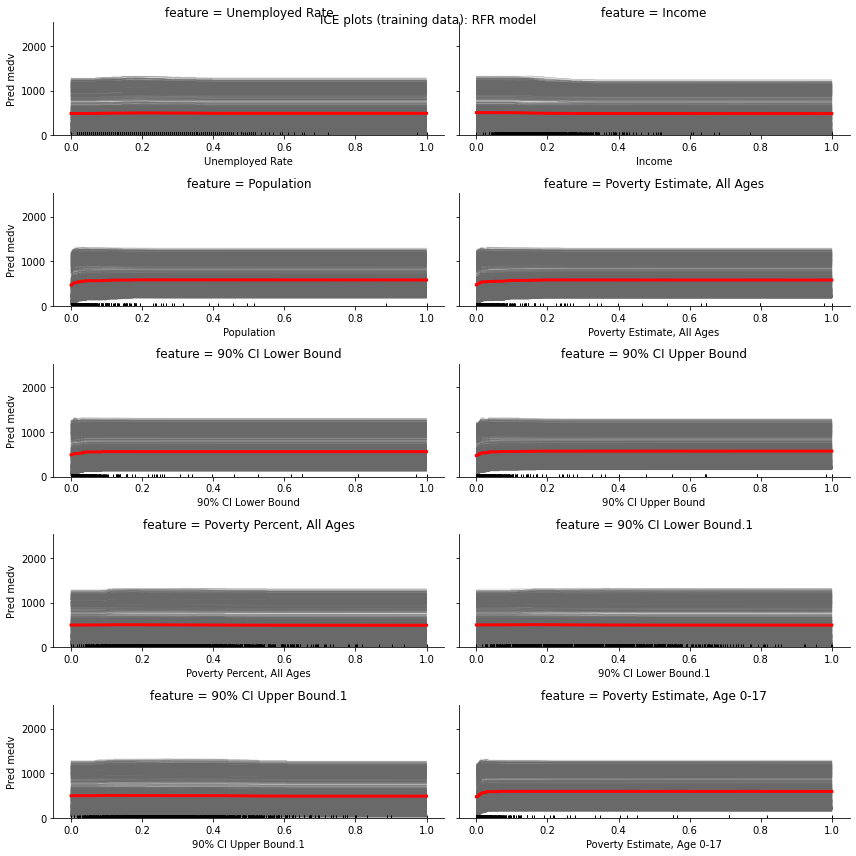

In [ ]:
# columns to plot
features = train_X_df.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=train_X_df, column=feat, predict=ETR.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, train_X_df, features,
                    ax_ylabel='Pred medv', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,np.max(y_train)])
plt.suptitle('ICE plots (training data): RFR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

***From the PDP plots we can see that some that***
* the change of all variables per unit has almost the same impact on the number of crimes at different values

## (10 pts) Describe what you see - we want 5 to 10 really descriptive bullets here that describe what you think the drivers of crime are. 
Are you able to say something about why certain counties have higher crimes than others?
If you find at this point that you have accidentally leaked information (and are getting a perfect prediction), please delete that variable and refine your model.
* Poverty rate have strong influence of the crimes, which means that a large part of the crime is robbery or theft.
* Although the poverty rate has a large impact on the model, the average income has a small impact. This means that the gap between the rich and the poor in many areas is very large, and the rich have pushed up the average income.
* Education level has a great influence on the number of crimes
* Education between 0-17 years old is very important, because the less education you receive before the age of 17, the higher the likelihood of participating in crime.
* The unemployment rate has a certain impact on the number of crimes, but the impact is not high, we think the reason is that the duration of unemployment is unknown. Only those who have been unemployed for a long time tend to survive by committing crimes.
* In the linear model, different variables have different impacts on the number of crimes at different numerical levels，I think this means the model is basic and the algorithm is relatively simple.



###Modeling Suggestions
Fit one more model that only uses the top 10 variables and see if you get the same fit with the simpler model.
You may need to present your scatterplots with log axes to show a better trend.

In [ ]:
abc=X# see our dataset
abc#save it ,just in canse

,Unemployed Rate,Income,Population,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,No High School Diploma,Diploma Only,Some college,Bachelors Degree plus
0,5.1,39721.0,55243,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,4291.0,12551.0,10596.0,9929.0
1,5.4,41286.0,207601,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,13893.0,41797.0,47274.0,48148.0
2,6.5,29264.0,22586,4099,3194,5004,20.1,15.7,24.5,1263,976,1550,27.5,21.3,33.7,892,683,1101,26.8,20.5,33.1,43079,38896,47262,3386.0,7256.0,3848.0,1678.0
3,5.4,31470.0,57494,8033,6506,9560,14.1,11.4,16.8,2568,1998,3138,19.4,15.1,23.7,1744,1324,2164,17.6,13.4,21.8,47213,43017,51409,7763.0,13299.0,13519.0,5210.0
4,6.6,34401.0,114973,19057,16226,21888,17.1,14.6,19.6,6313,5189,7437,25.7,21.1,30.3,4397,3556,5238,24.2,19.6,28.8,41778,38806,44750,12315.0,25940.0,26233.0,14620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,6.5,45863.0,9982,646,499,793,6.7,5.2,8.2,152,107,197,6.6,4.7,8.5,96,63,129,5.8,3.8,7.8,72198,64425,79971,273.0,2358.0,2626.0,1551.0
2243,6.1,48075.0,44222,4264,3610,4918,9.8,8.3,11.3,1073,790,1356,9.2,6.8,11.6,614,414,814,7.2,4.9,9.5,74546,68674,80418,2017.0,9239.0,10415.0,6291.0
2244,5.8,39613.0,20682,2183,1738,2628,10.6,8.4,12.8,681,498,864,11.3,8.3,14.3,420,293,547,9.6,6.7,12.5,64713,57915,71511,941.0,5383.0,4562.0,2078.0
2245,4.8,42129.0,8165,1060,855,1265,13.1,10.6,15.6,289,215,363,15.2,11.3,19.1,178,122,234,12.5,8.6,16.4,49533,44889,54177,568.0,1650.0,2031.0,1297.0



the top 10 important variables in ETR model is the following.
* 90% CI Lpper Bound
* 90% CI Uower Bound.6
* Some college
* No High School Diploma
* Population
* 90% CI Lpper Bound.3
* Poverty Estimate, All Ages
* Poverty Percent, All Ages
* 90% CI Lpper Bound.1
* 90% CI Upper Bound.1

In [ ]:
Xb = X[['90% CI Lower Bound','90% CI Upper Bound.6','Some college',
        'No High School Diploma','Population','90% CI Lower Bound.3'
        ,'Poverty Estimate, All Ages','Poverty Percent, All Ages'
        ,'90% CI Lower Bound.1','90% CI Upper Bound.1']]   # assgin Xb to the top 10 variables
         # 90% CI Uower Bound.6 Some college No High School Diploma Population 90% CI Lpper Bound.3 Poverty Estimate, All Ages Poverty Percent, All Ages 90% CI Lpper Bound.1 90% CI Upper Bound.1']]
Xb

,90% CI Lower Bound,90% CI Upper Bound.6,Some college,No High School Diploma,Population,90% CI Lower Bound.3,"Poverty Estimate, All Ages","Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1
0,6255,58088,10596.0,4291.0,55243,15.6,7444,13.5,11.3,15.7
1,20132,59670,47274.0,13893.0,207601,13.9,24005,11.7,9.8,13.6
2,3194,47262,3848.0,3386.0,22586,21.3,4099,20.1,15.7,24.5
3,6506,51409,13519.0,7763.0,57494,15.1,8033,14.1,11.4,16.8
4,16226,44750,26233.0,12315.0,114973,21.1,19057,17.1,14.6,19.6
...,...,...,...,...,...,...,...,...,...,...
2242,499,79971,2626.0,273.0,9982,4.7,646,6.7,5.2,8.2
2243,3610,80418,10415.0,2017.0,44222,6.8,4264,9.8,8.3,11.3
2244,1738,71511,4562.0,941.0,20682,8.3,2183,10.6,8.4,12.8
2245,855,54177,2031.0,568.0,8165,11.3,1060,13.1,10.6,15.6


In [ ]:

features = Xb  # assgin features to the Xb( with the top 10 variables)

training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=5)

#bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=14, min_samples_split=8, n_estimators=100

#copy and paste the above data 
exported_pipelinetop10 = make_pipeline(
    ZeroCount(),
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.7500000000000001, 
                                                    min_samples_leaf=14, min_samples_split=8, n_estimators=100)),
    LassoLarsCV(normalize=False)
)

exported_pipelinetop10.fit(training_features, training_target)
results = exported_pipelinetop10.predict(testing_features)
results1 = exported_pipelinetop10.predict(training_features)# add a training
print(mean_absolute_error(testing_target, results))  # peint the mae of testing
print(mean_absolute_error(training_target, results1)) # for the results 




238.02644849747733
217.6707605433538


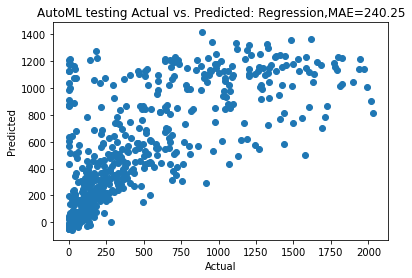

In [ ]:
# make a scatterplot of the autoML
plt.scatter(x=testing_target, y=results)
plt.xlabel('Actual')# label for x
plt.ylabel('Predicted')# label for y
plt.title('AutoML testing Actual vs. Predicted: Regression,MAE=238.25') #title
plt.show()

***The MAE of this new ETR model is 238.02 in testing dataset. The MAE of the ETR model we have before is 239.725. So obviously we have a better ETR model now with only top 10 variables.***

# Conclusion (5 pts)

* We found four reliable external data on the websites of different National Bureaus of Statistics, and we have created a unified key to ensure that there will be no large amount of data loss when merging datasets.
* On the exploratory data analysis part we explored the relation between our external data and the target variable, making sure that our external data is meaningful.
* We built the models step by step, first simple linear model, then pipelining to do parameter adjustment, and the next is autoML. We caculated the MAE for each model and found the best one.
* After we found the best model we further did permutation testing to check the relationship between number of crimes and all variables. We then used the top 10 useful variables to refit the best model we got before and got rid of the useless variables.
* We also used PDP plots to identify the influence of each variable and make some conclusion based on the result. 
* Based on this model, insurance companies can provide services with different insurance premiums to people in different regions, reducing the level of risk.
* The government can use the analysis results of this project to formulate corresponding policies to reduce the crime rate like by solving the unemployment problem, increasing educational funding and so on.
* Next time we may go further on machine learning part and try to use multithreading to test more models in less time.